In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import imputation3 as imp

In [2]:
pathTrainData = '../html2023-spring-final-project-stage-2/html2023-spring-final-project/train.csv'
pathTestData = '../html2023-spring-final-project-stage-2/html2023-spring-final-project/test.csv'
helpTestDance = '../html2023-spring-final-project-stage-2/test_partial_answer.csv'

In [3]:
train = pd.read_csv(pathTrainData)
test = pd.read_csv(pathTestData)
partialAnswer = pd.read_csv(helpTestDance)

In [4]:
train

Danceability    Energy  Key  Loudness  Speechiness  Acousticness  \
0               0.0  0.000273  3.0   -25.176       0.0443  7.241508e-01   
1               0.0  0.184220  7.0       NaN          NaN  6.722214e-01   
2               0.0       NaN  6.0   -15.596          NaN  6.676276e-01   
3               1.0  0.209585  NaN    -6.251       0.0277  3.796416e-03   
4               4.0       NaN  5.0       NaN       0.0260  3.048625e-06   
...             ...       ...  ...       ...          ...           ...   
17165           3.0  0.794023  5.0    -6.344       0.0328  8.991539e-02   
17166           2.0  0.820026  4.0    -1.786          NaN  2.195200e-05   
17167           1.0  0.571787  4.0    -4.679       0.0647           NaN   
17168           1.0  0.451218  9.0       NaN       0.4190  4.511802e-02   
17169           2.0  0.825294  6.0    -4.543       0.1070  2.125393e-08   

       Instrumentalness  Liveness  Valence    Tempo  ...  \
0              0.000062  0.000807   0.3400   83.398  ...   
1              0.910000  0.034966   0.7460  148.692  ...   
2              0.867000  0.001772   0.3800   84.899  ...   
3                   NaN  0.001000      NaN  150.220  ...   
4              0.000467  0.002924   0.2950   97.997  ...   
...                 ...       ...      ...      ...  ...   
17165          0.000000  0.000591   0.6580   90.002  ...   
17166          0.000000  0.000786   0.6570  174.869  ...   
17167          0.000000  0.003652   0.4190  168.388  ...   
17168               NaN  0.001260   0.5390  155.378  ...   
17169          0.911000  0.002515   0.0787  160.067  ...   

                                   Album  \
0      Sinkovsky Plays and Sings Vivaldi   
1                                    NaN   
2              Vivaldi: The Four Seasons   
3                       Life Thru A Lens   
4                             Escapology   
...                                  ...   
17165               JUST DANCE HARDSTYLE   
17166     SET FIRE TO THE RAIN HARDSTYLE   
17167          OUTSIDE HARDSTYLE SPED UP   
17168                ONLY GIRL HARDSTYLE   
17169                 MISS YOU HARDSTYLE   

                                        Uri  \
0      spotify:track:7njAZhca4o80qQdCgyEWya   
1      spotify:track:2nnXe7n3Vivs7OfQKRsfWD   
2      spotify:track:0VQMAup2VdeQWLCvM14Uz2   
3      spotify:track:1M2nd8jNUkkwrc1dgBPTJz   
4      spotify:track:2Ms33RTRCT6gArrpcrPxmo   
...                                     ...   
17165  spotify:track:0RtcKQGyI4hr8FgFH1TuYG   
17166  spotify:track:3rHvPA8lUnPBkaLyPOc0VV   
17167  spotify:track:4jk00YxPtPbhvHJE9N4ddv   
17168  spotify:track:5EyErbpsugWliX006eTDex   
17169  spotify:track:6lOn0jz1QpjcWeXo1oMm0k   

                                             Url_spotify  \
0      https://open.spotify.com/artist/2QOIawHpSlOwXD...   
1      https://open.spotify.com/artist/2QOIawHpSlOwXD...   
2      https://open.spotify.com/artist/2QOIawHpSlOwXD...   
3      https://open.spotify.com/artist/2HcwFjNelS49kF...   
4      https://open.spotify.com/artist/2HcwFjNelS49kF...   
...                                                  ...   
17165  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   
17166  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   
17167  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   
17168  https://open.spotify.com/artist/3EYY5FwDkHEYLw...   
17169                                                NaN   

                                       Url_youtube Comments  \
0      https://www.youtube.com/watch?v=NzCL9uLkQSI   3070.0   
1      https://www.youtube.com/watch?v=jAnzlpPuIDU    122.0   
2      https://www.youtube.com/watch?v=jAnzlpPuIDU    122.0   
3      https://www.youtube.com/watch?v=luwAMFcc2f8  24350.0   
4      https://www.youtube.com/watch?v=iy4mXZN1Zzk  31150.0   
...                                            ...      ...   
17165                                          NaN      0.0   
17166                                          NaN      0.0   
171

In [5]:
def is_nan(x):
    if type(x) == float:
        if np.isnan(x):
            return True
        else:
            return False

def LabelEncoding(data):
    k = data.unique()
    nlabel = {}
    for i, label in enumerate(k):
        if not is_nan(label):
            nlabel[label] = i#f'{i}'
    return nlabel

def categoricalData(data, list):
    labels = {}
    for i in list:
        if i != 'Key':
            labels[i] = LabelEncoding(data[i])
    return labels

def getDatasetReady(data):
    categoryList = ['Key', 'Album_type', 'Url_spotify', 'Channel', 'Composer']
    # data.loc[data['id'].isin(partialAnswer['id']), 'Danceability'] = partialAnswer['Danceability']
    data.set_index('id', inplace= True)
    data.drop(columns=['Uri', 'Url_youtube', 'Description', 'Title', 'Artist', 'Album', 'Track', "official_video", "Licensed"], inplace=True)



    labels = categoricalData(data, categoryList)

    for i in categoryList:
        if i != 'Key':
            data[i] = data[i].replace(labels[i])
    return data


In [6]:
trainProcess = getDatasetReady(train)

In [7]:
trainProcess

Danceability    Energy  Key  Loudness  Speechiness  Acousticness  \
id                                                                        
0               0.0  0.000273  3.0   -25.176       0.0443  7.241508e-01   
1               0.0  0.184220  7.0       NaN          NaN  6.722214e-01   
2               0.0       NaN  6.0   -15.596          NaN  6.676276e-01   
3               1.0  0.209585  NaN    -6.251       0.0277  3.796416e-03   
4               4.0       NaN  5.0       NaN       0.0260  3.048625e-06   
...             ...       ...  ...       ...          ...           ...   
17165           3.0  0.794023  5.0    -6.344       0.0328  8.991539e-02   
17166           2.0  0.820026  4.0    -1.786          NaN  2.195200e-05   
17167           1.0  0.571787  4.0    -4.679       0.0647           NaN   
17168           1.0  0.451218  9.0       NaN       0.4190  4.511802e-02   
17169           2.0  0.825294  6.0    -4.543       0.1070  2.125393e-08   

       Instrumentalness  Liveness  Valence    Tempo  Duration_ms        Views  \
id                                                                              
0              0.000062  0.000807   0.3400   83.398     117907.0          NaN   
1              0.910000  0.034966   0.7460  148.692     173427.0     184825.0   
2              0.867000  0.001772   0.3800   84.899     150667.0     184825.0   
3                   NaN  0.001000      NaN  150.220     265000.0  202457327.0   
4              0.000467  0.002924   0.2950   97.997     263867.0  316688049.0   
...                 ...       ...      ...      ...          ...          ...   
17165          0.000000  0.000591   0.6580   90.002      94667.0          NaN   
17166          0.000000  0.000786   0.6570  174.869     150857.0     164741.0   
17167          0.000000  0.003652   0.4190  168.388     136842.0      35646.0   
17168               NaN  0.001260   0.5390  155.378     108387.0       6533.0   
17169          0.911000  0.002515   0.0787  160.067     181500.0     158697.0   

           Likes       Stream  Album_type  Url_spotify  Comments  Channel  \
id                                                                          
0       137622.0   19981370.0         0.0          0.0    3070.0      0.0   
1         5190.0          NaN         NaN          0.0     122.0      1.0   
2         5190.0   19320810.0         NaN          0.0     122.0      1.0   
3       997035.0  399661898.0         0.0          1.0   24350.0      2.0   
4      1299086.0          NaN         0.0          1.0   31150.0      2.0   
...          ...          ...         ...          ...       ...      ...   
17165     1113.0          NaN         NaN       1823.0       0.0   5190.0   
17166     2019.0   10898176.0         2.0       1823.0       0.0   5190.0   
17167      329.0          NaN         2.0       1823.0       0.0      NaN   
17168        NaN    6873961.0         2.0       1823.0       0.0   5190.0   
17169     2484.0    5695584.0         2.0          NaN       0.0   5190.0   

       Composer  
id               
0           NaN  
1           1.0  
2           1.0  
3           2.0  
4           3.0  
...         ...  
17165       1.0  
17166       3.0  
17167       4.0  
17168       1.0  
17169       3.0  

[17170 rows x 19 columns]

In [8]:
trainImputCopy = trainProcess.copy()
trainY = trainImputCopy['Danceability']
trainImputCopy = trainImputCopy.drop(columns=['Danceability'], axis=1)

INIT IMPUTER

In [9]:
impute = imp.testImputate(trainImputCopy)

In [10]:
impute.loadPredictions()
trainInputed  = impute.miceTrainedModel(trainImputCopy, savePredictions=True)

___ Processing Energy ___
___ Processing Key ___


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match thos

___ Processing Loudness ___
___ Processing Speechiness ___
___ Processing Acousticness ___
___ Processing Instrumentalness ___
___ Processing Liveness ___
___ Processing Valence ___
___ Processing Tempo ___


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match thos

___ Processing Duration_ms ___
___ Processing Views ___
___ Processing Likes ___
___ Processing Stream ___
___ Processing Album_type ___


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match thos

___ Processing Url_spotify ___
___ Processing Comments ___
___ Processing Channel ___
___ Processing Composer ___


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match thos

-- Imputation Done --


In [11]:
trainInputed

Energy  Key   Loudness  Speechiness  Acousticness  Instrumentalness  \
id                                                                             
0      0.000273  3.0 -25.176000     0.044300  7.241508e-01          0.000062   
1      0.184220  7.0 -13.065174     0.264156  6.722214e-01          0.910000   
2      0.416055  6.0 -15.596000     0.247164  6.676276e-01          0.867000   
3      0.209585  3.0  -6.251000     0.027700  3.796416e-03          0.155723   
4      0.437961  5.0  -9.230150     0.026000  3.048625e-06          0.000467   
...         ...  ...        ...          ...           ...               ...   
17165  0.794023  5.0  -6.344000     0.032800  8.991539e-02          0.000000   
17166  0.820026  4.0  -1.786000     0.119218  2.195200e-05          0.000000   
17167  0.571787  4.0  -4.679000     0.064700  2.420526e-01          0.000000   
17168  0.451218  9.0 -12.854186     0.419000  4.511802e-02          0.286892   
17169  0.825294  6.0  -4.543000     0.107000  2.125393e-08          0.911000   

       Liveness   Valence    Tempo  Duration_ms         Views         Likes  \
id                                                                            
0      0.000807  0.340000   83.398     117907.0  2.419411e+07  1.376220e+05   
1      0.034966  0.746000  148.692     173427.0  1.848250e+05  5.190000e+03   
2      0.001772  0.380000   84.899     150667.0  1.848250e+05  5.190000e+03   
3      0.001000  0.464492  150.220     265000.0  2.024573e+08  9.970350e+05   
4      0.002924  0.295000   97.997     263867.0  3.166880e+08  1.299086e+06   
...         ...       ...      ...          ...           ...           ...   
17165  0.000591  0.658000   90.002      94667.0  8.094088e+06  1.113000e+03   
17166  0.000786  0.657000  174.869     150857.0  1.647410e+05  2.019000e+03   
17167  0.003652  0.419000  168.388     136842.0  3.564600e+04  3.290000e+02   
17168  0.001260  0.539000  155.378     108387.0  6.533000e+03  1.840925e+05   
17169  0.002515  0.078700  160.067     181500.0  1.586970e+05  2.484000e+03   

             Stream  Album_type  Url_spotify  Comments      Channel  Composer  
id                                                                             
0      1.998137e+07         0.0     0.000000    3070.0     0.000000       9.0  
1      8.965657e+07         3.0     0.000000     122.0     1.000000       1.0  
2      1.932081e+07         3.0     0.000000     122.0     1.000000       1.0  
3      3.996619e+08         0.0     1.000000   24350.0     2.000000       2.0  
4      2.128747e+08         0.0     1.000000   31150.0     2.000000       3.0  
...             ...         ...          ...       ...          ...       ...  
17165  6.877551e+07         3.0  1823.000000       0.0  5190.000000       1.0  
17166  1.089818e+07         2.0  1823.000000       0.0  5190.000000       3.0  
17167  5.843464e+07         2.0  1823.000000       0.0  1779.552716       4.0  
17168  6.873961e+06         2.0  1823.000000       0.0  5190.000000       1.0  
17169  5.695584e+06         2.0  1572.985095       0.0  5190.000000       3.0  

[17170 rows x 18 columns]

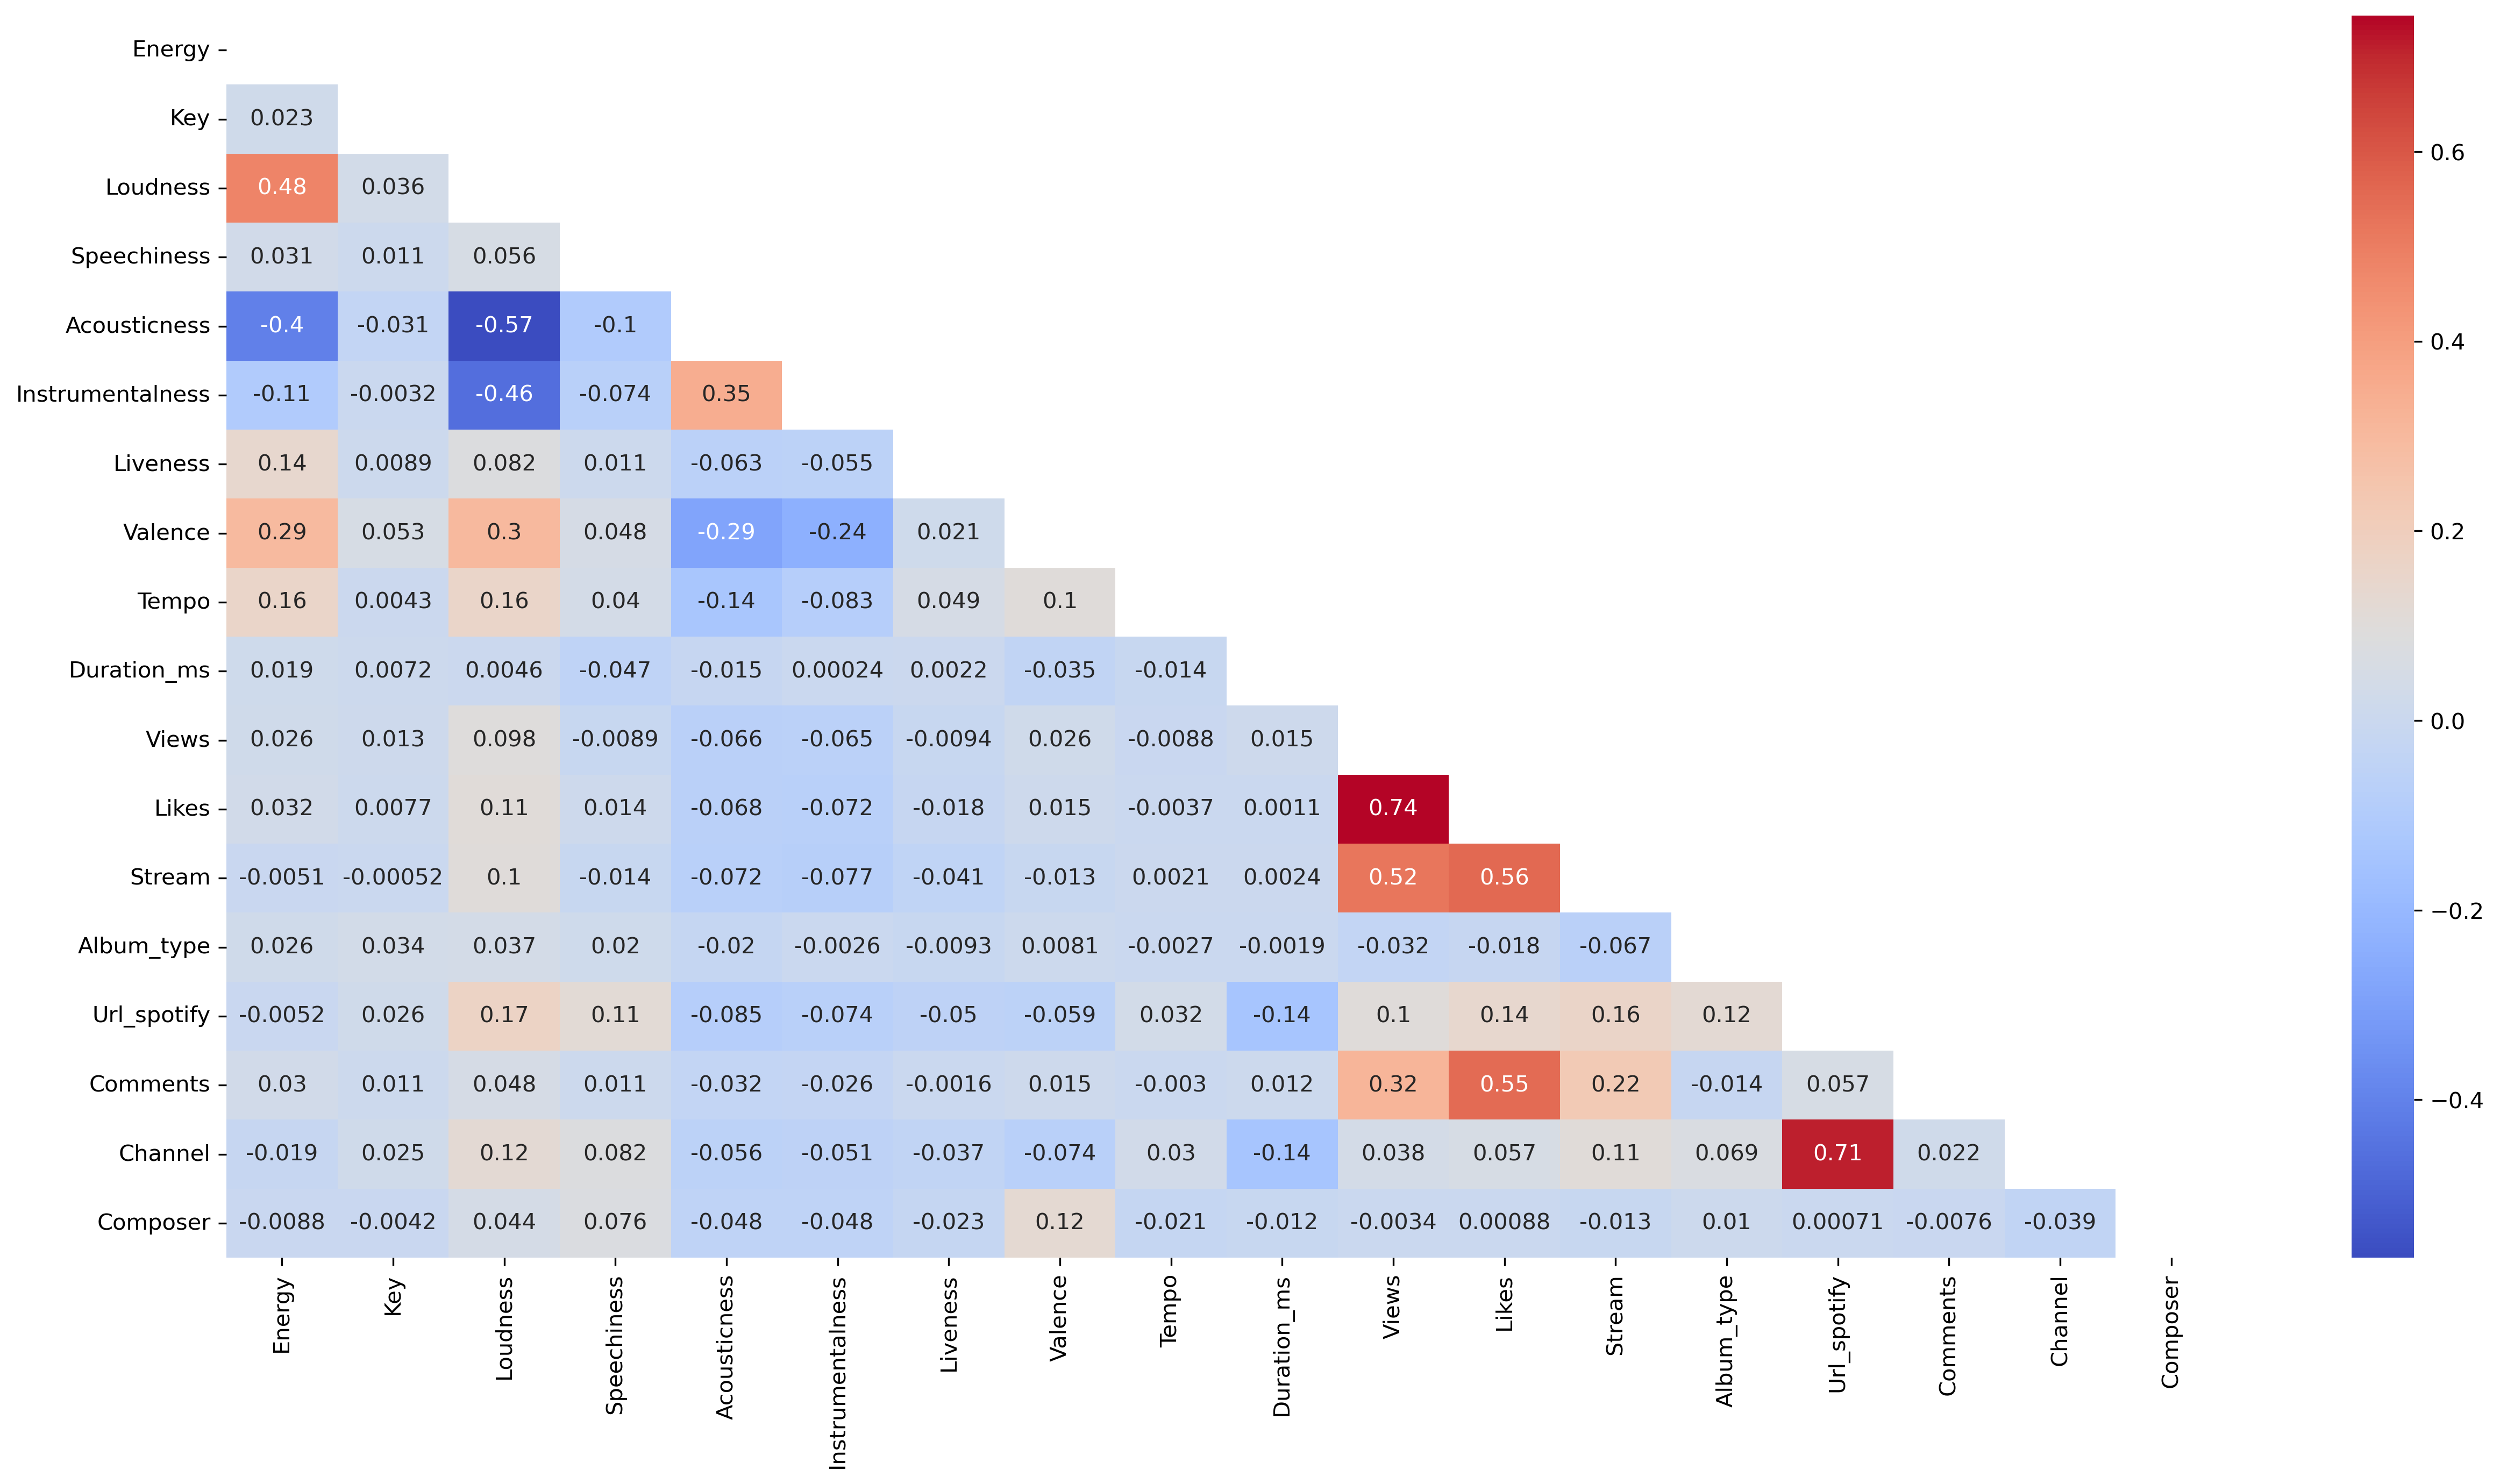

In [12]:
fig, ax = plt.subplots(figsize=(20, 10), dpi=300)
mask = np.triu(np.ones_like(trainInputed.corr()))
dataplot = sns.heatmap(trainInputed.corr(), cmap="coolwarm", annot=True, mask=mask)

GET NEW DATA FOR IMPUTED DATASET

In [13]:
def processTrainingData(data):
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.preprocessing import OneHotEncoder

    dataCopy = data.copy()
    trainedCat = dataCopy.iloc[:,dataCopy.columns.isin(['Key', 'Composer', "Album_type"])]
    standardize = dataCopy.iloc[:, dataCopy.columns.isin(['Loudness', 'Duration_ms', 'Views', 'Likes', 'Stream', 'Url_spotify', 'Comments', 'Channel'])]
    normaldata = dataCopy.iloc[:, ~dataCopy.columns.isin(['Loudness', 'Duration_ms', 'Views', 'Likes', 'Stream', 'Url_spotify', 'Comments', 'Channel', 'Key', 'Composer', "Album_type"])]


    # Scale Data
    scaler = MinMaxScaler()
    scaledData = scaler.fit_transform(standardize)
    scaledDataPD = pd.DataFrame(scaledData, columns=standardize.columns)
    scaledDataPD.set_index(normaldata.index, inplace=True)  

    # OneHotEncoder
    onehotEncoder =  OneHotEncoder()
    encoded = onehotEncoder.fit_transform( trainedCat)
    onehotEncodedData = pd.DataFrame(data=encoded.toarray(), columns=onehotEncoder.get_feature_names_out())
    onehotEncodedData.set_index(normaldata.index, inplace=True)

    trainData = pd.concat((normaldata, scaledDataPD, onehotEncodedData), axis=1)

    return scaler, onehotEncoder, trainData

def processTrainingDataTest(data, scaler, onehotEncoder):

    dataCopy = data.copy()
    trainedCat = dataCopy.iloc[:,dataCopy.columns.isin(['Key', 'Composer', "Album_type"])]
    standardize = dataCopy.iloc[:, dataCopy.columns.isin(['Loudness', 'Duration_ms', 'Views', 'Likes', 'Stream', 'Url_spotify', 'Comments', 'Channel'])]
    normaldata = dataCopy.iloc[:, ~dataCopy.columns.isin(['Loudness', 'Duration_ms', 'Views', 'Likes', 'Stream', 'Url_spotify', 'Comments', 'Channel', 'Key', 'Composer', "Album_type"])]

    # Scale Data
    scaler = scaler
    scaledData = scaler.transform(standardize)
    scaledDataPD = pd.DataFrame(scaledData, columns=standardize.columns)
    scaledDataPD = scaledDataPD.set_index(normaldata.index)
    scaledDataPD.set_index(normaldata.index, inplace=True)    

    # OneHotEncoder
    onehotEncoder =  onehotEncoder
    encoded = onehotEncoder.transform( trainedCat)
    onehotEncodedData = pd.DataFrame(data=encoded.toarray(), columns=onehotEncoder.get_feature_names_out())
    onehotEncodedData.set_index(normaldata.index, inplace=True)

    testData = pd.concat((normaldata, scaledDataPD, onehotEncodedData), axis=1)

    return testData

PREPROCESSING 

In [14]:
scaler, onehotEncoder, trainDataReady = processTrainingData(trainInputed)

In [15]:
trainDataReady

Energy  Speechiness  Acousticness  Instrumentalness  Liveness  \
id                                                                       
0      0.000273     0.044300  7.241508e-01          0.000062  0.000807   
1      0.184220     0.264156  6.722214e-01          0.910000  0.034966   
2      0.416055     0.247164  6.676276e-01          0.867000  0.001772   
3      0.209585     0.027700  3.796416e-03          0.155723  0.001000   
4      0.437961     0.026000  3.048625e-06          0.000467  0.002924   
...         ...          ...           ...               ...       ...   
17165  0.794023     0.032800  8.991539e-02          0.000000  0.000591   
17166  0.820026     0.119218  2.195200e-05          0.000000  0.000786   
17167  0.571787     0.064700  2.420526e-01          0.000000  0.003652   
17168  0.451218     0.419000  4.511802e-02          0.286892  0.001260   
17169  0.825294     0.107000  2.125393e-08          0.911000  0.002515   

        Valence    Tempo  Loudness  Duration_ms     Views  ...  Composer_1.0  \
id                                                         ...                 
0      0.340000   83.398  0.447642     0.019102  0.004190  ...           0.0   
1      0.746000  148.692  0.704882     0.031303  0.000032  ...           1.0   
2      0.380000   84.899  0.651126     0.026301  0.000032  ...           1.0   
3      0.464492  150.220  0.849618     0.051426  0.035065  ...           0.0   
4      0.295000   97.997  0.786339     0.051177  0.054849  ...           0.0   
...         ...      ...       ...          ...       ...  ...           ...   
17165  0.658000   90.002  0.847642     0.013995  0.001402  ...           1.0   
17166  0.657000  174.869  0.944456     0.026343  0.000029  ...           0.0   
17167  0.419000  168.388  0.883008     0.023263  0.000006  ...           0.0   
17168  0.539000  155.378  0.709363     0.017010  0.000001  ...           1.0   
17169  0.078700  160.067  0.885896     0.033077  0.000027  ...           0.0   

       Composer_2.0  Composer_3.0  Composer_4.0  Composer_5.0  Composer_6.0  \
id                                                                            
0               0.0           0.0           0.0           0.0           0.0   
1               0.0           0.0           0.0           0.0           0.0   
2               0.0           0.0           0.0           0.0           0.0   
3               1.0           0.0           0.0           0.0           0.0   
4               0.0           1.0           0.0           0.0           0.0   
...             ...           ...           ...           ...           ...   
17165           0.0           0.0           0.0           0.0           0.0   
17166           0.0           1.0           0.0           0.0           0.0   
17167           0.0           0.0           1.0           0.0           0.0   
17168           0.0           0.0           0.0           0.0           0.0   
17169           0.0           1.0           0.0           0.0           0.0   

       Composer_7.0  Composer_8.0  Composer_9.0  Composer_10.0  
id                                                              
0               0.0           0.0           1.0            0.0  
1               0.0           0.0           0.0            0.0  
2               0.0           0.0           0.0            0.0  
3               0.0           0.0           0.0            0.0  
4               0.0           0.0           0.0            0.0  
...             ...           ...           ...            ...  
17165           0.0           0.0           0.0            0.0  
17166           0.0           0.0           0.0            0.0  
17167           0.0           0.0           0.0            0.0  
17168           0.0           0.0           0.0            0.0  
17169           0.0           0.0           0.0            0.0  

[17170 rows x 41 columns]

SHUFFLE DATA

In [16]:
# from sklearn.model_selection import train_test_split
# X_train, X_Validation, y_train, y_Validation = train_test_split(trainDataReady, trainY, test_size=0.2, random_state=42)

In [17]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(trainDataReady, trainY)

GET READY TEST DATA

In [18]:
testProcess = getDatasetReady(test)

In [19]:
testInputed  = impute.miceTrainedModel(testProcess, savePredictions=True)

___ Processing Energy ___
___ Processing Key ___


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match thos

___ Processing Loudness ___
___ Processing Speechiness ___
___ Processing Acousticness ___
___ Processing Instrumentalness ___
___ Processing Liveness ___
___ Processing Valence ___
___ Processing Tempo ___
___ Processing Duration_ms ___
___ Processing Views ___
___ Processing Likes ___
___ Processing Stream ___


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match thos

___ Processing Album_type ___


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


___ Processing Url_spotify ___
___ Processing Comments ___
___ Processing Channel ___
___ Processing Composer ___


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match thos

-- Imputation Done --


In [20]:
partialAnswer=  partialAnswer.set_index('id')

In [21]:
partialAnswer.index

Int64Index([18871, 18872, 18873, 18879, 18882, 18886, 18887, 18894, 18896,
            18899,
            ...
            23405, 23421, 23434, 23436, 23442, 23462, 23463, 23473, 23482,
            23484],
           dtype='int64', name='id', length=631)

In [22]:
testInputedData = testInputed.copy()


In [23]:
testInputedData = testInputedData.loc[partialAnswer.index, :]

In [24]:
testInputedData

Energy   Key   Loudness  Speechiness  Acousticness  Instrumentalness  \
id                                                                              
18871  0.611960   8.0 -14.455375     0.113318      0.004574          0.000193   
18872  0.334797   3.0  -7.516004     0.091200      0.016777          0.001590   
18873  0.148036   6.0 -10.117000     0.280000      0.000007          0.237780   
18879  0.167284  10.0 -10.070093     0.101000      0.043987          0.000000   
18882  0.098611  10.0  -7.576000     0.040300      0.440711          0.000000   
...         ...   ...        ...          ...           ...               ...   
23462  0.307725   7.0  -2.533880     0.033415      0.299857          0.013672   
23463  0.269900   0.0 -11.299350     0.104984      0.006946          0.001588   
23473  0.480568   8.0  -3.828332     0.086666      0.153384          0.001714   
23482  0.426223   5.0  -5.807545     0.072906      0.661708          0.898308   
23484  0.014679   8.0 -13.808881     0.082686      0.076426          0.214188   

       Liveness   Valence       Tempo    Duration_ms         Views  \
id                                                                   
18871  0.000634  0.641972  121.002000  255773.000000  1.488170e+08   
18872  0.125597  0.962000  121.002000  292125.776839  1.488170e+08   
18873  0.066923  0.443096   99.439000  259888.175436  4.140185e+06   
18879  0.003049  0.391000   96.105089  302602.000000  8.687921e+07   
18882  0.000625  0.450000  125.900000   77480.000000  3.363790e+05   
...         ...       ...         ...            ...           ...   
23462  0.001309  0.770259   95.871722  123963.758812  2.393215e+06   
23463  0.001355  0.466107  103.858359  193565.214910  1.175475e+08   
23473  0.000114  0.287141   91.755727  193892.112089  7.459512e+06   
23482  0.000662  0.087281   87.969239  185842.047750 -3.451740e+06   
23484  0.001583  0.735073   98.873933  160431.173035  3.006389e+06   

              Likes        Stream  Album_type  Url_spotify      Comments  \
id                                                                         
18871  9.370610e+05  1.112196e+08         0.0  1010.156151  24156.000000   
18872  7.147798e+05  2.148720e+08         0.0   183.000000  24156.000000   
18873  1.086309e+06  4.495917e+07         0.0   183.000000   1597.000000   
18879  7.036050e+05  1.986931e+07         2.0  1024.001457  14291.000000   
18882  9.175000e+03  9.368100e+05         0.0   184.000000    379.000000   
...             ...           ...         ...          ...           ...   
23462  4.887013e+04  8.150851e+07         0.0   973.000000   6036.000000   
23463  3.806590e+05  6.228127e+07         2.0    24.000000    940.000000   
23473  8.290086e+02  3.013345e+06         0.0   634.000000    202.000000   
23482  2.305163e+04  1.849094e+07         2.0   114.000000  80261.032291   
23484  9.235481e+04  3.439282e+06         0.0   998.767406     11.000000   

       Channel  Composer  
id                        
18871    562.0       2.0  
18872    562.0       2.0  
18873    566.0       2.0  
18879    569.0       3.0  
18882    570.0       4.0  
...        ...       ...  
23462    187.0       1.0  
23463   2629.0       2.0  
23473   2633.0       1.0  
23482   2636.0       7.0  
23484    261.0       0.0  

[631 rows x 18 columns]

In [25]:
testInputedDataReady = processTrainingDataTest(testInputedData, scaler, onehotEncoder)

In [26]:
testInputedDataReady

Energy  Speechiness  Acousticness  Instrumentalness  Liveness  \
id                                                                       
18871  0.611960     0.113318      0.004574          0.000193  0.000634   
18872  0.334797     0.091200      0.016777          0.001590  0.125597   
18873  0.148036     0.280000      0.000007          0.237780  0.066923   
18879  0.167284     0.101000      0.043987          0.000000  0.003049   
18882  0.098611     0.040300      0.440711          0.000000  0.000625   
...         ...          ...           ...               ...       ...   
23462  0.307725     0.033415      0.299857          0.013672  0.001309   
23463  0.269900     0.104984      0.006946          0.001588  0.001355   
23473  0.480568     0.086666      0.153384          0.001714  0.000114   
23482  0.426223     0.072906      0.661708          0.898308  0.000662   
23484  0.014679     0.082686      0.076426          0.214188  0.001583   

        Valence       Tempo  Loudness  Duration_ms     Views  ...  \
id                                                            ...   
18871  0.641972  121.002000  0.675353     0.049399  0.025775  ...   
18872  0.962000  121.002000  0.822748     0.057387  0.025775  ...   
18873  0.443096   99.439000  0.767502     0.050303  0.000717  ...   
18879  0.391000   96.105089  0.768498     0.059690  0.015047  ...   
18882  0.450000  125.900000  0.821474     0.010218  0.000058  ...   
...         ...         ...       ...          ...       ...  ...   
23462  0.770259   95.871722  0.928571     0.020433  0.000414  ...   
23463  0.466107  103.858359  0.742388     0.035728  0.020359  ...   
23473  0.287141   91.755727  0.901076     0.035800  0.001292  ...   
23482  0.087281   87.969239  0.859037     0.034031 -0.000598  ...   
23484  0.735073   98.873933  0.689085     0.028447  0.000521  ...   

       Composer_1.0  Composer_2.0  Composer_3.0  Composer_4.0  Composer_5.0  \
id                                                                            
18871           0.0           1.0           0.0           0.0           0.0   
18872           0.0           1.0           0.0           0.0           0.0   
18873           0.0           1.0           0.0           0.0           0.0   
18879           0.0           0.0           1.0           0.0           0.0   
18882           0.0           0.0           0.0           1.0           0.0   
...             ...           ...           ...           ...           ...   
23462           1.0           0.0           0.0           0.0           0.0   
23463           0.0           1.0           0.0           0.0           0.0   
23473           1.0           0.0           0.0           0.0           0.0   
23482           0.0           0.0           0.0           0.0           0.0   
23484           0.0           0.0           0.0           0.0           0.0   

       Composer_6.0  Composer_7.0  Composer_8.0  Composer_9.0  Composer_10.0  
id                                                                            
18871           0.0           0.0           0.0           0.0            0.0  
18872           0.0           0.0           0.0           0.0            0.0  
18873           0.0           0.0           0.0           0.0            0.0  
18879           0.0           0.0           0.0           0.0            0.0  
18882           0.0           0.0           0.0           0.0            0.0  
...             ...           ...           ...           ...            ...  
23462           0.0           0.0           0.0           0.0            0.0  
23463           0.0           0.0           0.0           0.0            0.0  
23473           0.0           0.0           0.0           0.0            0.0  
23482           0.0           1.0           0.0           0.0            0.0  
23484           0.0           0.0           0.0           0.0            0.0  

[631 rows x 41 columns]

In [27]:
X_test = testInputedDataReady
y_test = partialAnswer

X_Validation = X_test
y_Validation = y_test

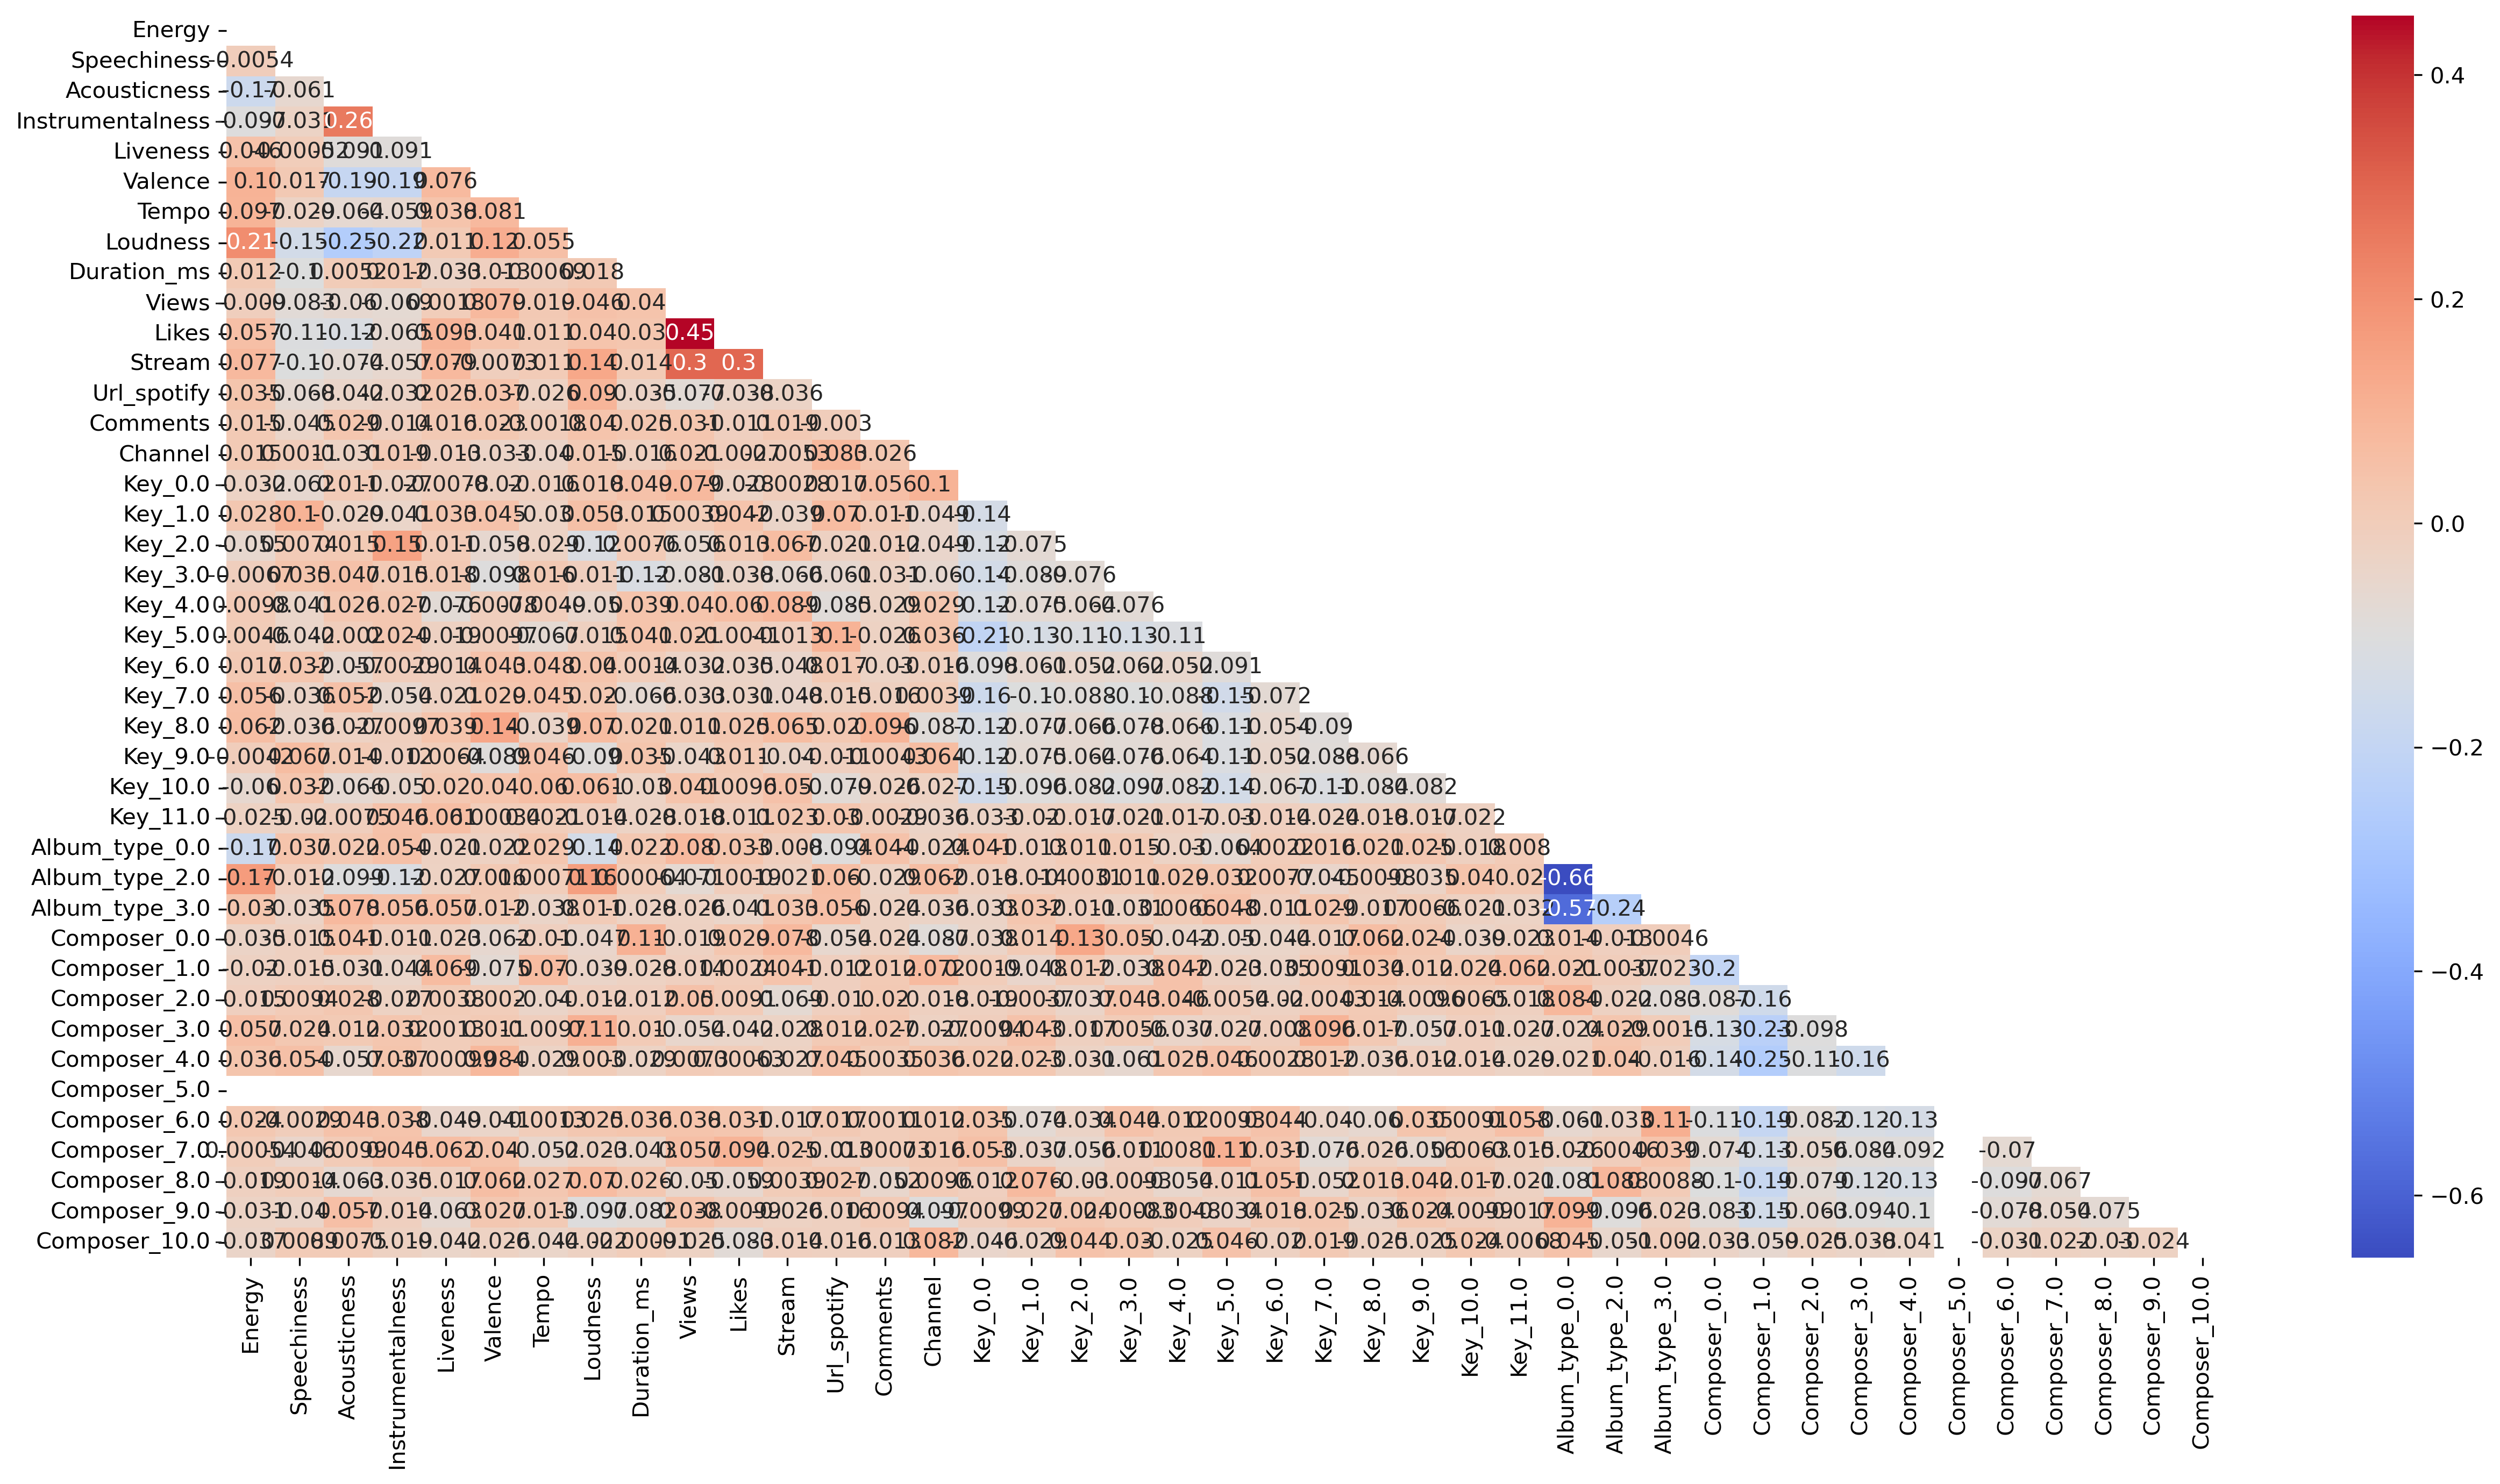

In [28]:
fig, ax = plt.subplots(figsize=(20, 10), dpi=300)
mask = np.triu(np.ones_like(X_test.corr()))
dataplot = sns.heatmap(X_test.corr(), cmap="coolwarm", annot=True, mask=mask)

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

def printErrors(y, y_hat):
    acc = accuracy_score(y, y_hat)
    mae = mean_absolute_error(y, y_hat)
    mse = mean_squared_error(y, y_hat)

    print(f'ACC: {acc * 100}, MAE:{mae}, MSE:{mse}')
    # return acc * 100, mae, mse

# Random Forest Classifier 

In [30]:
from sklearn.ensemble import RandomForestClassifier
randomForestClass = RandomForestClassifier()
randomForestClass.fit(X_train, y_train)

RandomForestClassifier()

In [31]:
predVal = randomForestClass.predict(X_Validation)
printErrors(y_Validation, predVal)

ACC: 15.372424722662439, MAE:2.809825673534073, MSE:13.044374009508717


In [32]:
predTest = randomForestClass.predict(X_test)
printErrors(y_test, predTest)

ACC: 15.372424722662439, MAE:2.809825673534073, MSE:13.044374009508717


<AxesSubplot:>

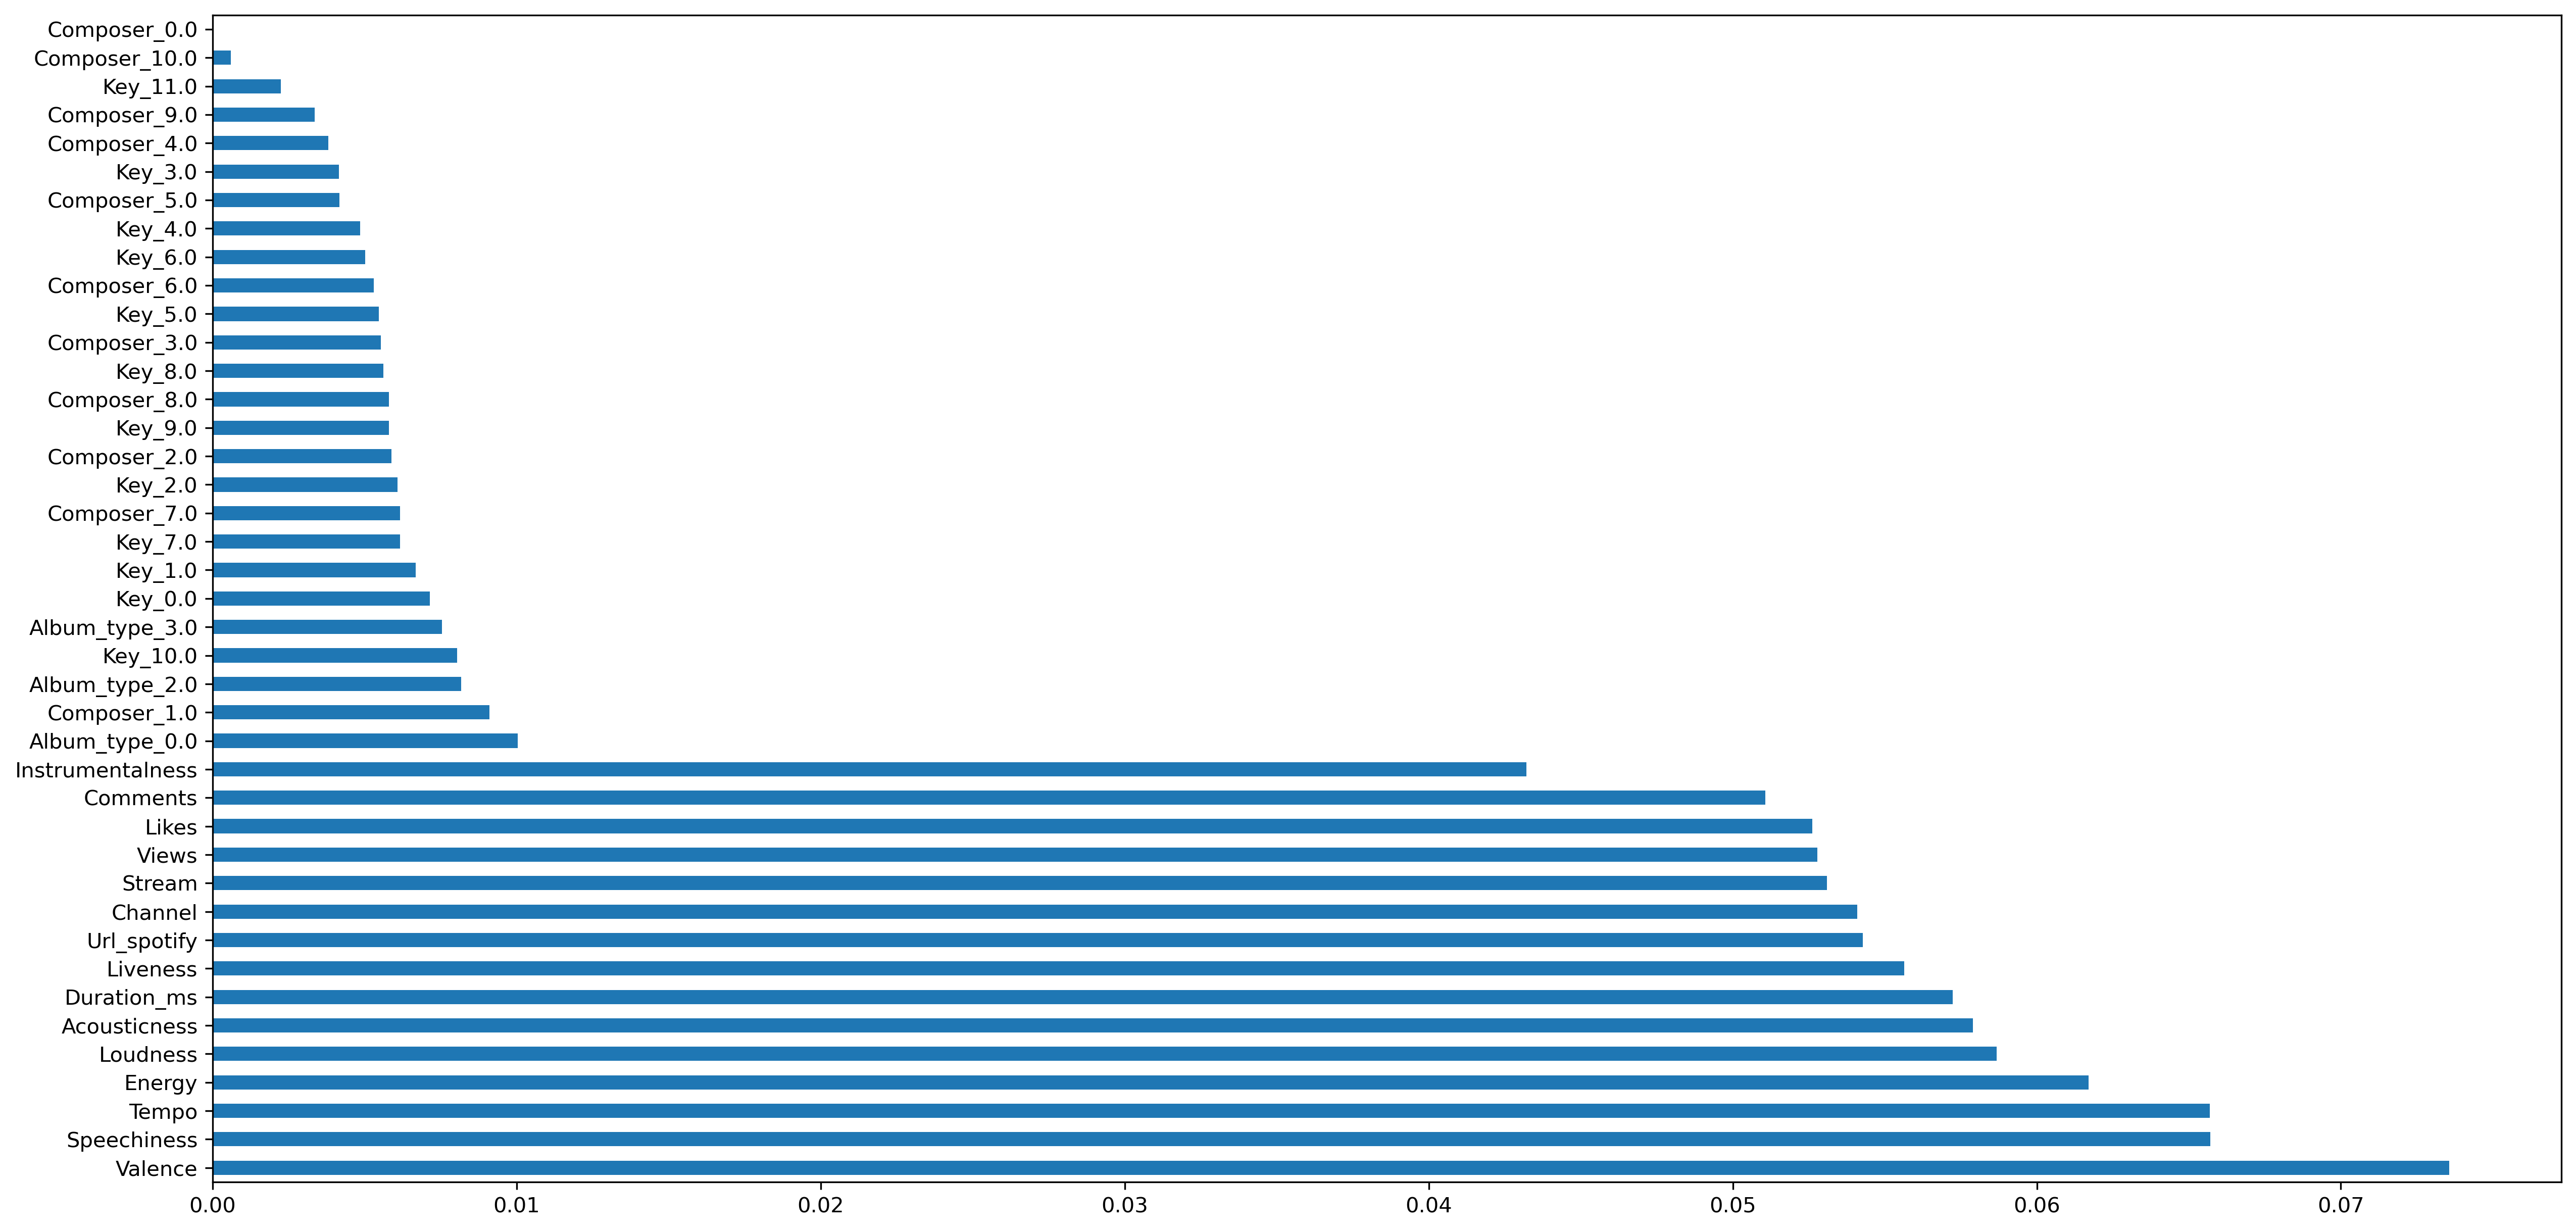

In [33]:
fig, ax = plt.subplots(figsize=(20, 10), dpi=300)
feat_importances = pd.Series(randomForestClass.feature_importances_, index=X_train.columns)
feat_importances.nlargest(100).plot(kind='barh')

In [562]:
X_train.columns


Index(['Energy', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
       'Valence', 'Tempo', 'Loudness', 'Duration_ms', 'Views', 'Likes',
       'Stream', 'Url_spotify', 'Comments', 'Channel', 'Key_0.0', 'Key_1.0',
       'Key_2.0', 'Key_3.0', 'Key_4.0', 'Key_5.0', 'Key_6.0', 'Key_7.0',
       'Key_8.0', 'Key_9.0', 'Key_10.0', 'Key_11.0', 'Album_type_0.0',
       'Album_type_2.0', 'Album_type_3.0', 'Composer_0.0', 'Composer_1.0',
       'Composer_2.0', 'Composer_3.0', 'Composer_4.0', 'Composer_5.0',
       'Composer_6.0', 'Composer_7.0', 'Composer_8.0', 'Composer_9.0',
       'Composer_10.0'],
      dtype='object')

In [580]:
feature_weights = [0.8, 1.2, 0.8, 0.8, 0.8, 2, 1.2, 0.8, 0.5, 0.5, 0.5,
       0.5, 0.8, 0.5, 0.5, 0.3, 0.3,
       0.3, 0.3, 0.3, 0.3, 0.3, 0.3,
       0.3, 0.3, 0.3, 0.3, 0.3,
       0.3, 0.3, 0.3, 0.3,
       0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5,
       0.5]

# Random Forest Regressor

In [194]:
from sklearn.ensemble import RandomForestRegressor

randomForestregressor = RandomForestRegressor()
randomForestregressor.fit(X_train, y_train)

RandomForestRegressor()

In [195]:
predVal = randomForestregressor.predict(X_Validation)
predVal = predVal.astype(int)
printErrors(y_Validation, predVal)

ACC: 18.52067559697146, MAE:1.7050087361677344, MSE:4.614152591729761


In [196]:
predTest = randomForestregressor.predict(X_test)
predTest = predTest.astype(int)
printErrors(y_test, predTest)

ACC: 13.153724247226625, MAE:2.283676703645008, MSE:7.868462757527734


<AxesSubplot:>

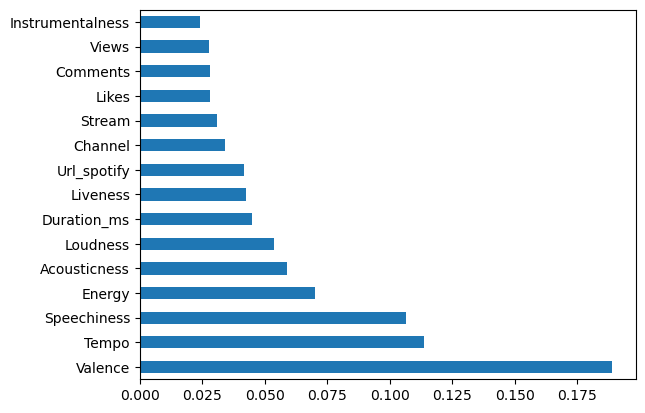

In [211]:
feat_importances = pd.Series(randomForestregressor.feature_importances_, index=X_train.columns)
feat_importances.nlargest(15).plot(kind='barh')

# light gbm

In [260]:
categories = len(y_test['Danceability'].unique())

In [422]:
params = {
    'objective': 'multiclassova',
    'num_class': categories ,  # Specify the number of classes
    'metric': 'multi_error',
    'boosting_type': 'random_forest',
    "max_depth": 6,
    "num_leaves": 50,
    # "min_data_in_leaf": 20, not required
    # "min_sum_hessian_in_leaf": 1e-3, not required
    # "min_gain_to_split": 0.5, not required
    "bagging_fraction": 0.8,
    # "feature_fraction": 1.0, not required
    # "feature_fraction_bynode": 0.8, not required
    "bagging_freq": 5,
    "verbosity":10
}

# Light GBM 1

In [554]:
params = {
    'objective': 'multiclassova',
    'num_class': categories ,  # Specify the number of classes
    'metric': 'multi_error',
    'boosting_type': 'random_forest',
    "max_depth": 6,
    "num_leaves": 50,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "verbosity":1
}

In [555]:

import lightgbm as lgb


# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_Validation, y_Validation, reference=lgb_train)
print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=500,
                valid_sets=lgb_eval,
                callbacks=[lgb.early_stopping(stopping_rounds=50)])

Starting training...
[LightGBM] [Info] Number of positive: 1310, number of negative: 12426
[LightGBM] [Info] Number of positive: 1268, number of negative: 12468
[LightGBM] [Info] Number of positive: 1327, number of negative: 12409
[LightGBM] [Info] Number of positive: 1366, number of negative: 12370
[LightGBM] [Info] Number of positive: 1329, number of negative: 12407
[LightGBM] [Info] Number of positive: 1352, number of negative: 12384
[LightGBM] [Info] Number of positive: 1481, number of negative: 12255
[LightGBM] [Info] Number of positive: 1446, number of negative: 12290
[LightGBM] [Info] Number of positive: 1514, number of negative: 12222
[LightGBM] [Info] Number of positive: 1343, number of negative: 12393
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001220 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3875
[LightGBM] [Info] Number of data points in the train set: 13736, number of used 

In [556]:
pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
y_pred = pred.argmax(axis=1)
printErrors(y_test, y_pred)

ACC: 17.27416798732171, MAE:2.966719492868463, MSE:14.510301109350237


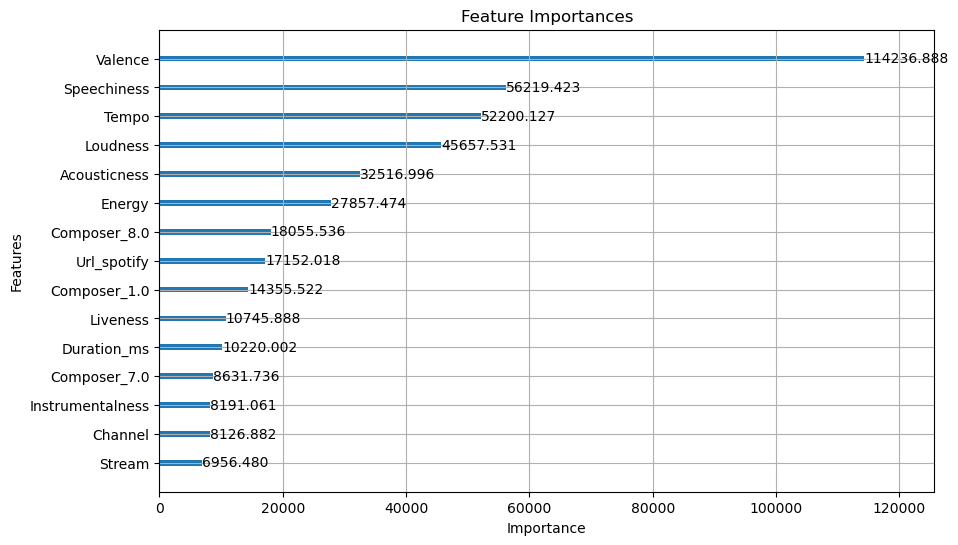

In [557]:
# Plot the feature importances
lgb.plot_importance(gbm, importance_type='gain', max_num_features=15, figsize=(10, 6))
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# Light GBM 2

Starting training...
[LightGBM] [Info] Number of positive: 1310, number of negative: 12426
[LightGBM] [Info] Number of positive: 1268, number of negative: 12468
[LightGBM] [Info] Number of positive: 1327, number of negative: 12409
[LightGBM] [Info] Number of positive: 1366, number of negative: 12370
[LightGBM] [Info] Number of positive: 1329, number of negative: 12407
[LightGBM] [Info] Number of positive: 1352, number of negative: 12384
[LightGBM] [Info] Number of positive: 1481, number of negative: 12255
[LightGBM] [Info] Number of positive: 1446, number of negative: 12290
[LightGBM] [Info] Number of positive: 1514, number of negative: 12222
[LightGBM] [Info] Number of positive: 1343, number of negative: 12393
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001109 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3875
[LightGBM] [Info] Number of data points in the train set: 13736, number of used 

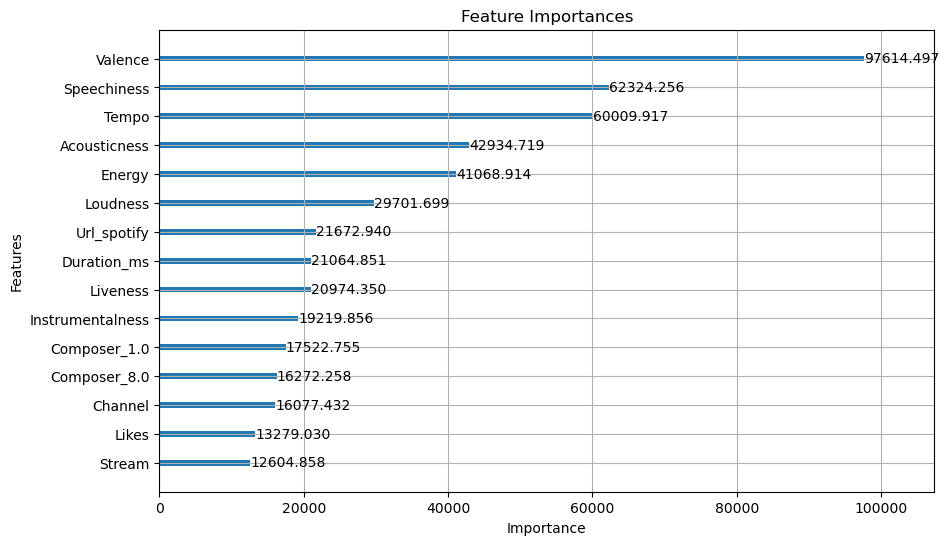

In [545]:
params = {
    'objective': 'multiclassova',
    'num_class': categories ,  # Specify the number of classes
    'metric': 'multi_error',
    'boosting_type': 'gbdt',
    "max_depth": 10,
    "num_leaves": 20,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "learning_rate":1e-2,
    "feature_fraction":0.5,
    'lambda_l1':1e-3,
    # "lambda_l2":1e-2,
    "verbosity":1
}

import lightgbm as lgb


# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_Validation, y_Validation, reference=lgb_train)
print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=1000,
                valid_sets=lgb_eval,
                callbacks=[lgb.early_stopping(stopping_rounds=50)])

print('\n\n-------  ERROR  ------ \n')

pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
# y_pred = pred.argmax(axis=1)
printErrors(y_test, y_pred)

print('\n-------  ERROR  ------ \n')

# Plot the feature importances
lgb.plot_importance(gbm, importance_type='gain', max_num_features=15, figsize=(10, 6))
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# Light GBM 3

Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000939 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3875
[LightGBM] [Info] Number of data points in the train set: 13736, number of used features: 40
[LightGBM] [Info] Start training from score -2.349993
[LightGBM] [Info] Start training from score -2.382579
[LightGBM] [Info] Start training from score -2.337099
[LightGBM] [Info] Start training from score -2.308133
[LightGBM] [Info] Start training from score -2.335593
[LightGBM] [Info] Start training from score -2.318435
[LightGBM] [Info] Start training from score -2.227303
[LightGBM] [Info] Start training from score -2.251219
[LightGBM] [Info] Start training from score -2.205265
[LightGBM] [Info] Start training from score -2.325114
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[5400]	valid_0's multi_logloss: 2.06707

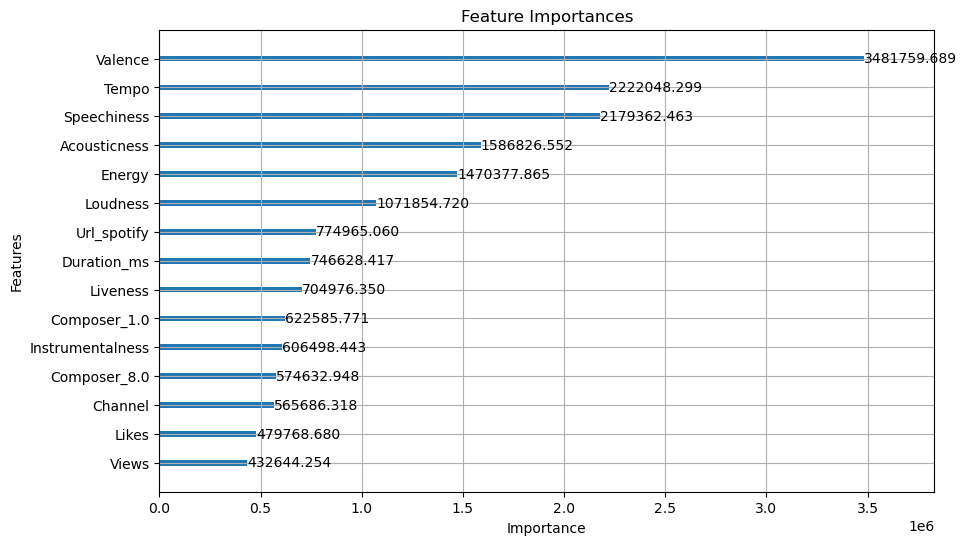

In [519]:
params = {
    'objective': 'multiclass',
    'num_class': categories ,  # Specify the number of classes
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',
    "max_depth": 10,
    "num_leaves": 20,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "learning_rate":2.3e-4,
    "feature_fraction":0.5,
    'lambda_l1':1e-2,
    "lambda_l2":1e-2,
    "verbosity":1
}

import lightgbm as lgb


# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_Validation, y_Validation, reference=lgb_train)
print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=5400,
                valid_sets=lgb_eval,
                callbacks=[lgb.early_stopping(stopping_rounds=5)])

print('\n\n-------  ERROR  ------ \n')

pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
y_pred = pred.argmax(axis=1)
printErrors(y_test, y_pred)

print('\n-------  ERROR  ------ \n')

# Plot the feature importances
lgb.plot_importance(gbm, importance_type='gain', max_num_features=15, figsize=(10, 6))
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# Light GBM 4 Regression

Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001532 seconds.
You can set `force_col_wise=true` to remove the overhead.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[38]	valid_0's rmse: 2.26025


-------  ERROR  ------ 

ACC: 11.885895404120443, MAE:2.2741679873217118, MSE:7.519809825673534

-------  ERROR  ------ 



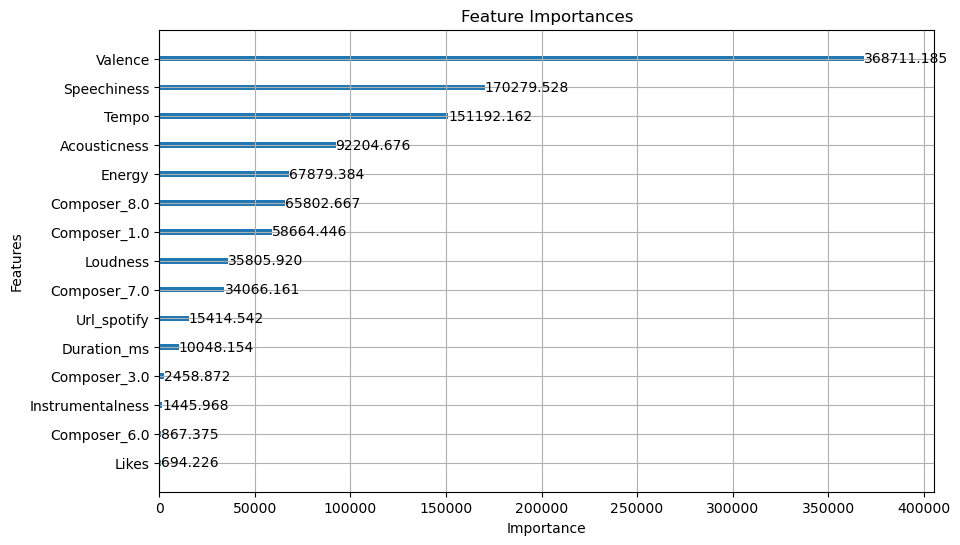

In [537]:
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'random_forest',
    "max_depth": 25,
    "num_leaves": 20,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "feature_fraction":0.8,
    "verbosity":0
}


import lightgbm as lgb


# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_Validation, y_Validation, reference=lgb_train)
print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=5400,
                valid_sets=lgb_eval,
                callbacks=[lgb.early_stopping(stopping_rounds=5)])

print('\n\n-------  ERROR  ------ \n')

pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
y_pred = pred.astype(int)

printErrors(y_test, y_pred)

print('\n-------  ERROR  ------ \n')

# Plot the feature importances
lgb.plot_importance(gbm, importance_type='gain', max_num_features=15, figsize=(10, 6))
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# Light GBM 5 Regression

Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001034 seconds.
You can set `force_col_wise=true` to remove the overhead.
Training until validation scores don't improve for 5 rounds
Did not meet early stopping. Best iteration is:
[5400]	valid_0's rmse: 2.33197


-------  ERROR  ------ 

ACC: 13.153724247226625, MAE:2.225039619651347, MSE:7.19809825673534

-------  ERROR  ------ 



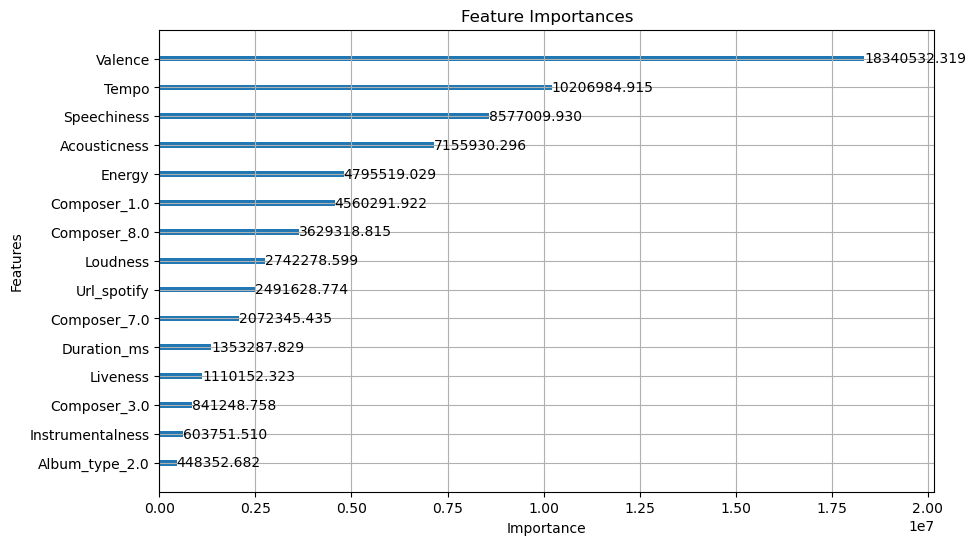

In [544]:
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    "max_depth": 10,
    "num_leaves": 20,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "learning_rate":2.3e-4,
    "feature_fraction":0.5,
    'lambda_l1':1e-2,
    "lambda_l2":1e-3,
    "verbosity":0
}


import lightgbm as lgb


# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_Validation, y_Validation, reference=lgb_train)
print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=5400,
                valid_sets=lgb_eval,
                callbacks=[lgb.early_stopping(stopping_rounds=5)])

print('\n\n-------  ERROR  ------ \n')


pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
y_pred = pred.astype(int)

printErrors(y_test, y_pred)

print('\n-------  ERROR  ------ \n')


# Plot the feature importances
lgb.plot_importance(gbm, importance_type='gain', max_num_features=15, figsize=(10, 6))
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# XBOOST 

[0]	train-mlogloss:2.10327	validation-mlogloss:2.20512
[1]	train-mlogloss:1.95460	validation-mlogloss:2.15253
[2]	train-mlogloss:1.83088	validation-mlogloss:2.11414
[3]	train-mlogloss:1.72925	validation-mlogloss:2.08542
[4]	train-mlogloss:1.63016	validation-mlogloss:2.06189
[5]	train-mlogloss:1.54400	validation-mlogloss:2.04337
[6]	train-mlogloss:1.47335	validation-mlogloss:2.02847
[7]	train-mlogloss:1.40425	validation-mlogloss:2.01813
[8]	train-mlogloss:1.33898	validation-mlogloss:2.01218
[9]	train-mlogloss:1.27865	validation-mlogloss:2.00780
[10]	train-mlogloss:1.23101	validation-mlogloss:2.00188
[11]	train-mlogloss:1.18391	validation-mlogloss:1.99856
[12]	train-mlogloss:1.13966	validation-mlogloss:1.99441
[13]	train-mlogloss:1.09788	validation-mlogloss:1.99299
[14]	train-mlogloss:1.05838	validation-mlogloss:1.99072
[15]	train-mlogloss:1.02012	validation-mlogloss:1.99015
[16]	train-mlogloss:0.98413	validation-mlogloss:1.98848
[17]	train-mlogloss:0.95250	validation-mlogloss:1.98830
[1

c:\Users\Miguel\anaconda3\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


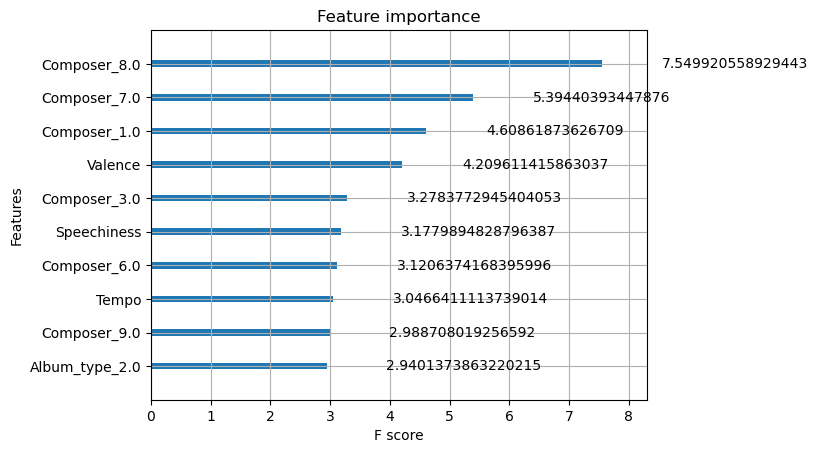

In [91]:
categories = len(y_test['Danceability'].unique())
# For XGBRegressor parameters
default_params = {
    'objective': 'multi:softmax',
    'booster': 'gbtree',
    'eval_metric': "mlogloss",
    'num_class': categories,
    'learning_rate': 0.3,#2.3e-4,
    'max_depth': 15,
    'min_child_weight': 10,
    'verbosity': 0
}

import xgboost as xgb


dtrain = xgb.DMatrix(data=X_train, label=y_train)
dValidation = xgb.DMatrix(data=X_Validation, label=y_Validation)
model = xgb.train(default_params, dtrain, num_boost_round=1500,
                  early_stopping_rounds=10, evals=[(dtrain, 'train'), (dValidation, 'validation')])

dtest = xgb.DMatrix(X_test)
y_pred = model.predict(dtest, ntree_limit=model.best_iteration+1)

printErrors(y_test, y_pred)

xgb.plot_importance(model, importance_type='gain', max_num_features=10)
plt.show()


# ENSEMBLE

In [34]:
totaltest = testInputed.copy()
totaltest_X = processTrainingDataTest(totaltest, scaler, onehotEncoder)

In [35]:
totaltest_X

Energy  Speechiness  Acousticness  Instrumentalness  Liveness  \
id                                                                       
17170  0.350403     0.177000  5.842771e-07          0.002330  0.230346   
17171  0.347429     0.030200  2.727257e-01          0.000687  0.000099   
17172  0.786330     0.052200  7.676563e-05          0.186428  0.001561   
17173  0.403583     0.026000  3.442951e-15          0.509000  0.000262   
17174  0.334255     0.171000  1.619428e-05          0.000000  0.000340   
...         ...          ...           ...               ...       ...   
23480  0.160377     0.045451  3.176921e-01          0.006016  0.001642   
23481  0.318585     0.073000  7.419596e-03          0.000817  0.008843   
23482  0.426223     0.072906  6.617082e-01          0.898308  0.000662   
23483  0.204440     0.037676  3.630868e-03          0.491785  0.030605   
23484  0.014679     0.082686  7.642603e-02          0.214188  0.001583   

        Valence       Tempo  Loudness  Duration_ms     Views  ...  \
id                                                            ...   
17170  0.540177  138.559000  0.840527     0.042117  0.120121  ...   
17171  0.852000   92.761000  0.858879     0.037180  0.012472  ...   
17172  0.551000  108.014000  0.898917     0.040471  0.001461  ...   
17173  0.578000  120.423000  0.858985     0.044585  0.019220  ...   
17174  0.525000  167.953000  0.799150     0.068110  0.107119  ...   
...         ...         ...       ...          ...       ...  ...   
23480  0.160253   72.136829  0.847156     0.044553  0.001669  ...   
23481  0.614366   96.437000  0.894274     0.023677  0.007920  ...   
23482  0.087281   87.969239  0.859037     0.034031 -0.000598  ...   
23483  0.482987   99.945737  0.736768     0.032887  0.002993  ...   
23484  0.735073   98.873933  0.689085     0.028447  0.000521  ...   

       Composer_1.0  Composer_2.0  Composer_3.0  Composer_4.0  Composer_5.0  \
id                                                                            
17170           0.0           0.0           0.0           0.0           0.0   
17171           1.0           0.0           0.0           0.0           0.0   
17172           1.0           0.0           0.0           0.0           0.0   
17173           0.0           1.0           0.0           0.0           0.0   
17174           0.0           0.0           1.0           0.0           0.0   
...             ...           ...           ...           ...           ...   
23480           0.0           0.0           0.0           0.0           0.0   
23481           0.0           0.0           0.0           1.0           0.0   
23482           0.0           0.0           0.0           0.0           0.0   
23483           0.0           0.0           0.0           1.0           0.0   
23484           0.0           0.0           0.0           0.0           0.0   

       Composer_6.0  Composer_7.0  Composer_8.0  Composer_9.0  Composer_10.0  
id                                                                            
17170           0.0           0.0           0.0           0.0            0.0  
17171           0.0           0.0           0.0           0.0            0.0  
17172           0.0           0.0           0.0           0.0            0.0  
17173           0.0           0.0           0.0           0.0            0.0  
17174           0.0           0.0           0.0           0.0            0.0  
...             ...           ...           ...           ...            ...  
23480           1.0           0.0           0.0           0.0            0.0  
23481           0.0           0.0           0.0           0.0            0.0  
23482           0.0           1.0           0.0           0.0            0.0  
23483           0.0           0.0           0.0           0.0            0.0  
23484           0.0           0.0           0.0           0.0            0.0  

[6315 rows x 41 columns]

Predictions Results Total Data

In [36]:
predictTest = pd.DataFrame()
predictionResults = pd.DataFrame()

### 1st MODEL

In [37]:
categories = len(y_test['Danceability'].unique())
# For XGBRegressor parameters
xboost_param = {
    'objective': 'multi:softmax',
    'booster': 'gbtree',
    'eval_metric': "mlogloss",
    'num_class': categories,
    'learning_rate': 0.3,#2.3e-4,
    'max_depth': 15,
    'min_child_weight': 10,
    'verbosity': 0
}

import xgboost as xgb


dtrain = xgb.DMatrix(data=X_train, label=y_train)
dValidation = xgb.DMatrix(data=X_Validation, label=y_Validation)
xboostModel = xgb.train(xboost_param, dtrain, num_boost_round=1500, early_stopping_rounds=10, evals=[(dtrain, 'train'), (dValidation, 'validation')])

dtest = xgb.DMatrix(X_test)
y_pred = xboostModel.predict(dtest, ntree_limit=xboostModel.best_iteration+1)

printErrors(y_test, y_pred)

dtestTotal = xgb.DMatrix(totaltest_X)
xboostPred = xboostModel.predict(dtestTotal, ntree_limit=xboostModel.best_iteration+1)

predictTest['XBoost'] = y_pred
predictionResults['XBoost'] = xboostPred


[0]	train-mlogloss:2.10664	validation-mlogloss:2.26692
[1]	train-mlogloss:1.96019	validation-mlogloss:2.25523
[2]	train-mlogloss:1.83635	validation-mlogloss:2.25400
[3]	train-mlogloss:1.72491	validation-mlogloss:2.25167
[4]	train-mlogloss:1.63061	validation-mlogloss:2.25661
[5]	train-mlogloss:1.54976	validation-mlogloss:2.26589
[6]	train-mlogloss:1.47751	validation-mlogloss:2.28323
[7]	train-mlogloss:1.41025	validation-mlogloss:2.28884
[8]	train-mlogloss:1.34906	validation-mlogloss:2.30421
[9]	train-mlogloss:1.29905	validation-mlogloss:2.30765
[10]	train-mlogloss:1.24794	validation-mlogloss:2.31632
[11]	train-mlogloss:1.20483	validation-mlogloss:2.32373
[12]	train-mlogloss:1.15960	validation-mlogloss:2.33419
ACC: 15.213946117274169, MAE:2.941362916006339, MSE:14.057052297939778


c:\Users\Miguel\anaconda3\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
c:\Users\Miguel\anaconda3\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


### 2do Model

In [38]:
categories = len(y_test['Danceability'].unique())
lightParams1 = {
    'objective': 'multiclassova',
    'num_class': categories ,  # Specify the number of classes
    'metric': 'multi_error',
    'boosting_type': 'random_forest',
    "max_depth": 6,
    "num_leaves": 50,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "verbosity":1
}

import lightgbm as lgb


# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_Validation, y_Validation, reference=lgb_train)
gbm = lgb.train(lightParams1,
                lgb_train,
                num_boost_round=500,
                valid_sets=lgb_eval,
                callbacks=[lgb.early_stopping(stopping_rounds=50)])

pred = gbm.predict(X_test, num_iteration=gbm.best_iteration+1)
y_pred = pred.argmax(axis=1)
printErrors(y_test, y_pred)

predTotal = gbm.predict(totaltest_X, num_iteration=gbm.best_iteration+1)
y_predTotal = predTotal.argmax(axis=1)

predictTest['lightGBM1'] = y_pred
predictionResults['lightGBM1'] = y_predTotal

[LightGBM] [Info] Number of positive: 1655, number of negative: 15515
[LightGBM] [Info] Number of positive: 1639, number of negative: 15531
[LightGBM] [Info] Number of positive: 1664, number of negative: 15506
[LightGBM] [Info] Number of positive: 1675, number of negative: 15495
[LightGBM] [Info] Number of positive: 1639, number of negative: 15531
[LightGBM] [Info] Number of positive: 1702, number of negative: 15468
[LightGBM] [Info] Number of positive: 1856, number of negative: 15314
[LightGBM] [Info] Number of positive: 1826, number of negative: 15344
[LightGBM] [Info] Number of positive: 1860, number of negative: 15310
[LightGBM] [Info] Number of positive: 1654, number of negative: 15516
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001410 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3875
[LightGBM] [Info] Number of data points in the train set: 17170, number of used features: 40
[LightGB

### 3rd Model

In [39]:
from sklearn.ensemble import RandomForestClassifier
randomForestClass = RandomForestClassifier()
randomForestClass.fit(X_train, y_train)

predVal = randomForestClass.predict(X_Validation)
printErrors(y_Validation, predVal)

predTest = randomForestClass.predict(X_test)
printErrors(y_test, predTest)

predTestTotal = randomForestClass.predict(totaltest_X)

predictTest['RandomForestClassifier'] = predTest
predictionResults['RandomForestClassifier'] = predTestTotal

ACC: 15.530903328050712, MAE:2.803486529318542, MSE:12.892234548335974
ACC: 15.530903328050712, MAE:2.803486529318542, MSE:12.892234548335974


### 4to Model

In [40]:
params = {
    'objective': 'multiclass',
    'num_class': categories ,  # Specify the number of classes
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',
    "max_depth": 10,
    "num_leaves": 20,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "learning_rate":2.3e-4,
    "feature_fraction":0.5,
    'lambda_l1':1e-2,
    "lambda_l2":1e-2,
    "verbosity":1
}

import lightgbm as lgb


# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_Validation, y_Validation, reference=lgb_train)
print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=5400,
                valid_sets=lgb_eval,
                callbacks=[lgb.early_stopping(stopping_rounds=5)])

print('\n\n-------  ERROR  ------ \n')

pred = gbm.predict(X_test, num_iteration=gbm.best_iteration+1)
y_pred = pred.argmax(axis=1)
printErrors(y_test, y_pred)

print('\n-------  ERROR  ------ \n')

predTotal = gbm.predict(totaltest_X, num_iteration=gbm.best_iteration+1)
y_predTotal = predTotal.argmax(axis=1)


predictTest['lightGBM2'] = y_pred
predictionResults['lightGBM2'] = y_predTotal


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000929 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3875
[LightGBM] [Info] Number of data points in the train set: 17170, number of used features: 40
[LightGBM] [Info] Start training from score -2.339363
[LightGBM] [Info] Start training from score -2.349077
[LightGBM] [Info] Start training from score -2.333939
[LightGBM] [Info] Start training from score -2.327351
[LightGBM] [Info] Start training from score -2.349077
[LightGBM] [Info] Start training from score -2.311360
[LightGBM] [Info] Start training from score -2.224740
[LightGBM] [Info] Start training from score -2.241036
[LightGBM] [Info] Start training from score -2.222587
[LightGBM] [Info] Start training from score -2.339967
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5003]	valid_0's multi_logloss: 2.23485


-------  E

In [41]:
from sklearn.ensemble import ExtraTreesClassifier
extraTress = ExtraTreesClassifier(n_estimators=100, random_state=0)
extraTress.fit(X_train, y_train)
predTestTress = extraTress.predict(X_test)
printErrors(y_test, predTestTress)


y_predTotalTress = extraTress.predict(totaltest_X)


predictTest['ExtraTreesClassifier1'] = predTestTress
predictionResults['ExtraTreesClassifier1'] = y_predTotalTress

ACC: 15.689381933438987, MAE:2.75594294770206, MSE:12.746434231378764


In [42]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.ensemble import ExtraTreesClassifier
OneVsOneClassifierModel = OneVsOneClassifier(ExtraTreesClassifier(n_estimators=100, random_state=123), n_jobs=8)
OneVsOneClassifierModel.fit(X_train, y_train)
predTestOneVsOneClassifier = OneVsOneClassifierModel.predict(X_test)
printErrors(y_test, predTestOneVsOneClassifier)


y_predTotalOneVsOneClassifier = OneVsOneClassifierModel.predict(totaltest_X)


predictTest['predTestOneVsOneClassifier'] = predTestOneVsOneClassifier
predictionResults['predTotalOneVsOneClassifier'] = y_predTotalOneVsOneClassifier

ACC: 17.11568938193344, MAE:2.6053882725832014, MSE:11.664025356576863


In [43]:
from sklearn.ensemble import RandomForestRegressor

randomForestregressor = RandomForestRegressor(n_estimators=1000)
randomForestregressor.fit(X_train, y_train)

predVal = randomForestregressor.predict(X_Validation)
predValInt = predVal.astype(int)
printErrors(y_Validation, predValInt)

predTest = randomForestregressor.predict(X_test)
predTestInt = predTest.astype(int)
printErrors(y_test, predTestInt)

y_predTotal = randomForestregressor.predict(totaltest_X)


predictTest['RandomForestRegressor1'] = predTest
predictionResults['RandomForestRegressor1'] = y_predTotal

ACC: 12.678288431061807, MAE:2.26148969889065, MSE:7.684627575277338
ACC: 12.678288431061807, MAE:2.26148969889065, MSE:7.684627575277338


In [47]:
params = {
    'objective': 'multiclassova',
    'num_class': categories ,  # Specify the number of classes
    'metric': 'multi_error',
    'boosting_type': 'gbdt',
    "max_depth": 15,
    "num_leaves": 20,
    "bagging_fraction": 0.5,
    "bagging_freq": 5,
    "learning_rate":1e-2,
    "feature_fraction":0.5,
    'lambda_l1':1e-3,
    "lambda_l2":1e-2,
    "verbosity":1
}

import lightgbm as lgb


# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_Validation, y_Validation, reference=lgb_train)
print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=1000,
                valid_sets=lgb_eval,
                callbacks=[lgb.early_stopping(stopping_rounds=50)])

print('\n\n-------  ERROR  ------ \n')

pred = gbm.predict(X_test, num_iteration=gbm.best_iteration+1)
y_pred = pred.argmax(axis=1)
printErrors(y_test, y_pred)

print('\n-------  ERROR  ------ \n')

predTotal = gbm.predict(totaltest_X, num_iteration=gbm.best_iteration+1)
y_predTotal = predTotal.argmax(axis=1)


predictTest['lightGBM3'] = y_pred
predictionResults['lightGBM3'] = y_predTotal

Starting training...
[LightGBM] [Info] Number of positive: 1655, number of negative: 15515
[LightGBM] [Info] Number of positive: 1639, number of negative: 15531
[LightGBM] [Info] Number of positive: 1664, number of negative: 15506
[LightGBM] [Info] Number of positive: 1675, number of negative: 15495
[LightGBM] [Info] Number of positive: 1639, number of negative: 15531
[LightGBM] [Info] Number of positive: 1702, number of negative: 15468
[LightGBM] [Info] Number of positive: 1856, number of negative: 15314
[LightGBM] [Info] Number of positive: 1826, number of negative: 15344
[LightGBM] [Info] Number of positive: 1860, number of negative: 15310
[LightGBM] [Info] Number of positive: 1654, number of negative: 15516
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001190 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3875
[LightGBM] [Info] Number of data points in the train set: 17170, number of used 

In [48]:
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    "max_depth": 10,
    "num_leaves": 20,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "learning_rate":2.3e-4,
    "feature_fraction":0.5,
    'lambda_l1':1e-2,
    "lambda_l2":1e-3,
    "verbosity":0
}


import lightgbm as lgb


# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_Validation, y_Validation, reference=lgb_train)
print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=5400,
                valid_sets=lgb_eval,
                callbacks=[lgb.early_stopping(stopping_rounds=5)])

print('\n\n-------  ERROR  ------ \n')


pred = gbm.predict(X_test, num_iteration=gbm.best_iteration+1)
y_pred = pred.astype(int)

printErrors(y_test, y_pred)

print('\n-------  ERROR  ------ \n')

predTotal = gbm.predict(totaltest_X, num_iteration=gbm.best_iteration+1)



predictTest['lightgbm5'] = pred
predictionResults['lightgbm5'] = predTotal



Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001084 seconds.
You can set `force_col_wise=true` to remove the overhead.
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5184]	valid_0's rmse: 2.62842


-------  ERROR  ------ 

ACC: 12.836767036450079, MAE:2.237717908082409, MSE:7.277337559429477

-------  ERROR  ------ 



In [51]:

default_params = {
    'objective': 'reg:squarederror',
    'booster': 'gbtree',
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'subsample': 1,
    'colsample_bytree': 1,
    'gamma': 0,
    'reg_alpha': 0,
    'reg_lambda': 1,
    'random_state': 42,
    'n_jobs': -1
}

import xgboost as xgb


dtrain = xgb.DMatrix(data=X_train, label=y_train)
dValidation = xgb.DMatrix(data=X_Validation, label=y_Validation)
xboostModel = xgb.train(default_params, dtrain, num_boost_round=1500, early_stopping_rounds=10, evals=[(dtrain, 'train'), (dValidation, 'validation')])

dtest = xgb.DMatrix(X_test)
y_pred = xboostModel.predict(dtest, ntree_limit=xboostModel.best_iteration+1)
y_predInt = np.round(y_pred)

printErrors(y_test, y_predInt)

dtestTotal = xgb.DMatrix(totaltest_X)
xboostPred = xboostModel.predict(dtestTotal, ntree_limit=xboostModel.best_iteration+1)

predictTest['XBoost2'] = y_pred
predictionResults['XBoost2'] = xboostPred


[0]	train-rmse:4.61881	validation-rmse:4.58044
[1]	train-rmse:4.29615	validation-rmse:4.28691
[2]	train-rmse:4.01389	validation-rmse:4.03631
[3]	train-rmse:3.76845	validation-rmse:3.81376
[4]	train-rmse:3.55365	validation-rmse:3.62427
[5]	train-rmse:3.36915	validation-rmse:3.47234
[6]	train-rmse:3.20862	validation-rmse:3.34595
[7]	train-rmse:3.07007	validation-rmse:3.23593
[8]	train-rmse:2.94787	validation-rmse:3.14063
[9]	train-rmse:2.84395	validation-rmse:3.05641
[10]	train-rmse:2.75539	validation-rmse:2.99482
[11]	train-rmse:2.67839	validation-rmse:2.93259
[12]	train-rmse:2.61349	validation-rmse:2.88665
[13]	train-rmse:2.55497	validation-rmse:2.85358
[14]	train-rmse:2.50606	validation-rmse:2.81972
[15]	train-rmse:2.46436	validation-rmse:2.79306
[16]	train-rmse:2.42642	validation-rmse:2.77028
[17]	train-rmse:2.39467	validation-rmse:2.75725
[18]	train-rmse:2.36772	validation-rmse:2.74196
[19]	train-rmse:2.34387	validation-rmse:2.72445
[20]	train-rmse:2.32192	validation-rmse:2.71577
[2

c:\Users\Miguel\anaconda3\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
c:\Users\Miguel\anaconda3\lib\site-packages\xgboost\core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


In [52]:
copyPredictTest = predictTest.copy()
ErrorsPD = pd.DataFrame()

ErrorsPD['Mean'] = copyPredictTest.mean(axis=1)
ErrorsPD['Median'] = copyPredictTest.median(axis=1)
ErrorsPD['Max'] = copyPredictTest.max(axis=1)
# copyPredictTest['Median'] = copyPredictTest.median(axis=1).astype(int)
copyPredictTest = copyPredictTest.set_index(y_test.index)
ErrorsPD = ErrorsPD.set_index(y_test.index)
print("-----MEDIAN-----")
printErrors(y_test, ErrorsPD['Median'].astype(int))
print("-----MEAN-----")
printErrors(y_test, ErrorsPD['Mean'].astype(int))
print("-----MAX-----")
printErrors(y_test, ErrorsPD['Max'].astype(int))

ErrorsPD['Y']=y_test

-----MEDIAN-----
ACC: 15.372424722662439, MAE:2.4865293185419968, MSE:10.213946117274167
-----MEAN-----
ACC: 14.104595879556259, MAE:2.397781299524564, MSE:9.183835182250396
-----MAX-----
ACC: 14.104595879556259, MAE:2.847860538827258, MSE:12.977812995245642


In [53]:
copyPredictTest

XBoost  lightGBM1  RandomForestClassifier  lightGBM2  \
id                                                            
18871     8.0          8                     8.0          7   
18872     9.0          7                     8.0          8   
18873     9.0          9                     9.0          9   
18879     3.0          7                     2.0          3   
18882     1.0          6                     2.0          6   
...       ...        ...                     ...        ...   
23462     4.0          6                     4.0          6   
23463     9.0          9                     9.0          8   
23473     0.0          0                     0.0          0   
23482     1.0          9                     0.0          0   
23484     4.0          8                     8.0          9   

       ExtraTreesClassifier1  predTestOneVsOneClassifier  \
id                                                         
18871                    5.0                         7.0   
18872                    6.0                         6.0   
18873                    9.0                         9.0   
18879                    8.0                         1.0   
18882                    7.0                         3.0   
...                      ...                         ...   
23462                    4.0                         4.0   
23463                    8.0                         6.0   
23473                    1.0                         3.0   
23482                    1.0                         1.0   
23484                    6.0                         6.0   

       RandomForestRegressor1  lightGBM3  lightgbm5   XBoost2  
id                                                             
18871                   6.350          8   5.275082  5.961726  
18872                   6.798          8   5.568221  6.674713  
18873                   6.717          9   5.274238  6.023655  
18879                   3.435          6   4.510582  4.477099  
18882                   4.238          6   4.266680  3.766056  
...                       ...        ...        ...       ...  
23462                   4.262          6   4.616934  4.824242  
23463                   6.145          6   5.283702  6.035145  
23473                   3.434          0   3.997273  3.376964  
23482                   3.576          0   3.994712  3.649094  
23484                   5.637          8   5.078421  5.960562  

[631 rows x 10 columns]

In [54]:
ErrorsPD

Mean    Median       Max    Y
id                                      
18871  6.858681  7.000000  8.000000  9.0
18872  7.104093  6.899000  9.000000  9.0
18873  8.101489  9.000000  9.000000  8.0
18879  4.242268  3.956050  8.000000  8.0
18882  4.327074  4.252340  7.000000  8.0
...         ...       ...       ...  ...
23462  4.770318  4.439467  6.000000  4.0
23463  7.246385  7.072500  9.000000  7.0
23473  1.480824  0.500000  3.997273  5.0
23482  2.321981  1.000000  9.000000  3.0
23484  6.567598  6.000000  9.000000  2.0

[631 rows x 4 columns]

In [74]:
copypredictionResults = predictionResults.copy()
ErrorsPDTotal = pd.DataFrame()

ErrorsPDTotal['Mean'] = copypredictionResults.mean(axis=1)
ErrorsPDTotal['Median'] = copypredictionResults.median(axis=1)
ErrorsPDTotal['Max'] = copypredictionResults.max(axis=1)
# copyPredictTest['Median'] = copyPredictTest.median(axis=1).astype(int)
copypredictionResults = copypredictionResults.set_index(totaltest_X.index)
ErrorsPDTotal = ErrorsPDTotal.set_index(totaltest_X.index)

In [75]:
ErrorsPDTotal

Mean    Median       Max
id                                 
17170  6.515154  6.500000  9.000000
17171  5.845677  5.693273  8.000000
17172  5.396698  5.379985  8.000000
17173  4.557240  4.043615  7.000000
17174  4.533833  4.477663  7.000000
...         ...       ...       ...
23480  1.510761  1.000000  3.502139
23481  7.396849  8.000000  9.000000
23482  2.321981  1.000000  9.000000
23483  5.717618  6.000000  8.000000
23484  6.567598  6.000000  9.000000

[6315 rows x 3 columns]

In [76]:
import datetime

current_datetime = datetime.datetime.now()
datetime_string = current_datetime.strftime("%Y%m%d_%H%M")
t = pd.DataFrame(ErrorsPDTotal.index,  columns=['id'])

t['Danceability'] = np.round(ErrorsPDTotal['Median'].values)

t.to_csv('Complete5' + datetime_string + '.csv', index=False)


Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000876 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3875
[LightGBM] [Info] Number of data points in the train set: 17170, number of used features: 40
[LightGBM] [Info] Start training from score -2.339363
[LightGBM] [Info] Start training from score -2.349077
[LightGBM] [Info] Start training from score -2.333939
[LightGBM] [Info] Start training from score -2.327351
[LightGBM] [Info] Start training from score -2.349077
[LightGBM] [Info] Start training from score -2.311360
[LightGBM] [Info] Start training from score -2.224740
[LightGBM] [Info] Start training from score -2.241036
[LightGBM] [Info] Start training from score -2.222587
[LightGBM] [Info] Start training from score -2.339967
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[5003]	valid_0's multi_logloss: 2.23485


-------  E

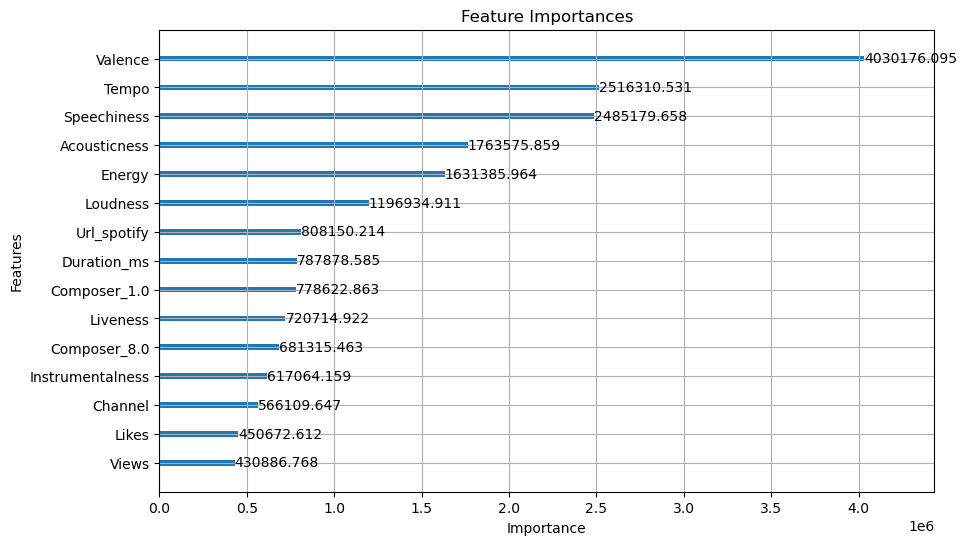

In [55]:
params = {
    'objective': 'multiclass',
    'num_class': categories ,  # Specify the number of classes
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',
    "max_depth": 10,
    "num_leaves": 20,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "learning_rate":2.3e-4,
    "feature_fraction":0.5,
    'lambda_l1':1e-2,
    "lambda_l2":1e-2,
    "verbosity":1
}

import lightgbm as lgb


# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_Validation, y_Validation, reference=lgb_train)
print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=5400,
                valid_sets=lgb_eval,
                callbacks=[lgb.early_stopping(stopping_rounds=5)])

print('\n\n-------  ERROR  ------ \n')

pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
y_pred = pred.argmax(axis=1)
printErrors(y_test, y_pred)

print('\n-------  ERROR  ------ \n')

# Plot the feature importances
lgb.plot_importance(gbm, importance_type='gain', max_num_features=15, figsize=(10, 6))
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

In [57]:
importance = gbm.feature_importance()
feature_names = gbm.feature_name()

# Create a list of tuples with feature names and importance scores
feature_importance_list = list(zip(feature_names, importance))

# Sort the list based on importance scores in descending order
sorted_importance = sorted(feature_importance_list, key=lambda x: x[1], reverse=True)

# Print feature importance in descending order
for feature_name, importance_score in sorted_importance:
    print(f"{feature_name}: {importance_score}")

Tempo: 96961
Valence: 89299
Acousticness: 85642
Speechiness: 83335
Energy: 70329
Duration_ms: 55063
Liveness: 51326
Url_spotify: 51263
Loudness: 50909
Channel: 42923
Likes: 35814
Views: 35674
Instrumentalness: 35074
Stream: 34956
Comments: 31014
Composer_1.0: 20513
Composer_8.0: 16715
Composer_7.0: 13809
Album_type_2.0: 8029
Composer_3.0: 6710
Album_type_0.0: 4087
Composer_6.0: 3693
Key_1.0: 2731
Key_9.0: 2597
Composer_5.0: 2322
Composer_4.0: 2239
Key_10.0: 2201
Key_0.0: 2105
Composer_9.0: 1825
Composer_2.0: 1678
Key_2.0: 1576
Key_8.0: 1116
Key_7.0: 1104
Key_5.0: 1047
Key_4.0: 1030
Key_3.0: 1015
Key_6.0: 915
Album_type_3.0: 784
Composer_10.0: 666
Key_11.0: 481
Composer_0.0: 0


In [69]:
# data = ['Tempo','Valence','Acousticness','Speechiness','Energy','Duration_ms','Liveness','Url_spotify','Loudness','Channel','Likes','Views','Instrumentalness','Stream','Comments']
data = ['Tempo','Valence','Acousticness','Speechiness','Energy']

In [70]:
Xtrain = X_train[data]
XValidation= X_Validation[data]
XTest= X_test[data]

Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000680 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 17170, number of used features: 5
[LightGBM] [Info] Start training from score -2.339363
[LightGBM] [Info] Start training from score -2.349077
[LightGBM] [Info] Start training from score -2.333939
[LightGBM] [Info] Start training from score -2.327351
[LightGBM] [Info] Start training from score -2.349077
[LightGBM] [Info] Start training from score -2.311360
[LightGBM] [Info] Start training from score -2.224740
[LightGBM] [Info] Start training from score -2.241036
[LightGBM] [Info] Start training from score -2.222587
[LightGBM] [Info] Start training from score -2.339967
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[831]	valid_0's multi_logloss: 2.27683


-------  ER

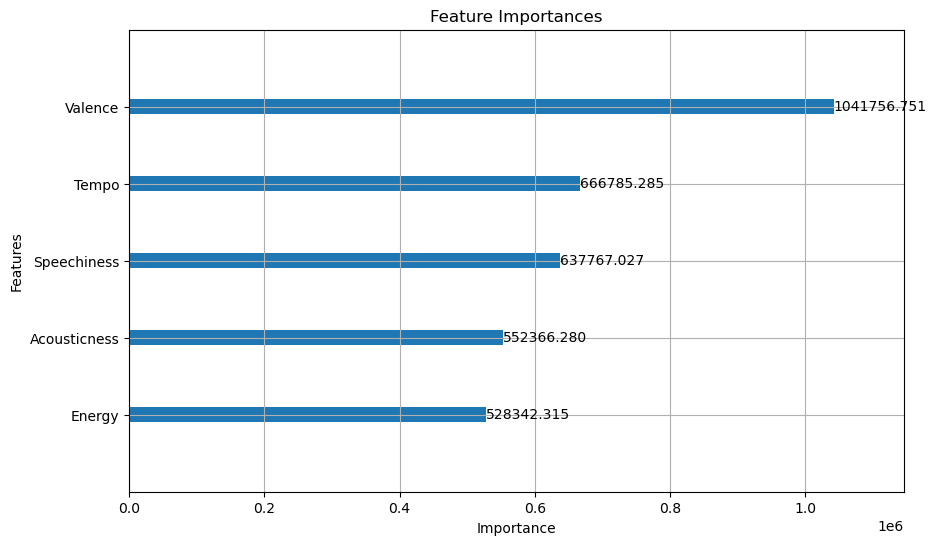

In [73]:
params = {
    'objective': 'multiclass',
    'num_class': categories ,  # Specify the number of classes
    'metric': 'multi_logloss',
    'boosting_type': 'gbdt',
    "max_depth": 10,
    "num_leaves": 20,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "learning_rate":0.001,
    "feature_fraction":0.5,
    # 'lambda_l1':1e-2,
    # "lambda_l2":1e-2,
    "verbosity":1
}

import lightgbm as lgb


# create dataset for lightgbm
lgb_train = lgb.Dataset(Xtrain, y_train)
lgb_eval = lgb.Dataset(XValidation, y_Validation, reference=lgb_train)
print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=5400,
                valid_sets=lgb_eval,
                callbacks=[lgb.early_stopping(stopping_rounds=50)])

print('\n\n-------  ERROR  ------ \n')

pred = gbm.predict(XTest, num_iteration=gbm.best_iteration)
y_pred = pred.argmax(axis=1)
printErrors(y_test, y_pred)

print('\n-------  ERROR  ------ \n')

# Plot the feature importances
lgb.plot_importance(gbm, importance_type='gain', max_num_features=15, figsize=(10, 6))
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

In [206]:

default_params = {
    'objective': 'reg:squarederror',
    'booster': 'gbtree',
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'subsample': 1,
    'colsample_bytree': 1,
    'gamma': 0,
    'reg_alpha': 0,
    'reg_lambda': 1,
    'random_state': 42,
    'n_jobs': -1
}

import xgboost as xgb

model = xgb.XGBClassifier(**default_params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
printErrors(y_test, y_pred)

# thresholds = np.sort(model.feature_importances_)


ACC: 12.519809825673534, MAE:3.028526148969889, MSE:14.537242472266245


In [207]:
thresholds = np.sort(model.feature_importances_)

In [213]:
y_pred = selection_model.predict(X_test)

predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

ValueError: Feature shape mismatch, expected: 1, got 41

In [210]:
from sklearn.feature_selection import SelectFromModel
for thresh in thresholds:
 # select features using threshold
 selection = SelectFromModel(model, threshold=thresh, prefit=True)
 select_X_train = selection.transform(X_train)
 # train model
 selection_model = xgb.XGBClassifier(**default_params)
 selection_model.fit(select_X_train, y_train)
 # eval model
 select_X_test = selection.transform(X_test)
 y_pred = selection_model.predict(select_X_test)
 predictions = [round(value) for value in y_pred]
 accuracy = accuracy_score(y_test, predictions)
 print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.000, n=41, Accuracy: 12.52%


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.002, n=40, Accuracy: 12.52%


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.008, n=39, Accuracy: 12.68%


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.010, n=38, Accuracy: 12.68%


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.010, n=37, Accuracy: 13.31%


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.010, n=36, Accuracy: 12.84%


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.010, n=35, Accuracy: 13.47%


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.011, n=34, Accuracy: 13.63%


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.012, n=33, Accuracy: 13.15%


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.013, n=32, Accuracy: 13.31%


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.013, n=31, Accuracy: 13.79%


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.013, n=30, Accuracy: 13.47%


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.013, n=29, Accuracy: 13.63%


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.013, n=28, Accuracy: 14.10%


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.013, n=27, Accuracy: 14.42%


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.014, n=26, Accuracy: 14.58%


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.015, n=25, Accuracy: 14.74%


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.015, n=24, Accuracy: 14.58%


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.015, n=23, Accuracy: 14.90%


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.016, n=22, Accuracy: 14.10%


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.016, n=21, Accuracy: 14.26%


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.017, n=20, Accuracy: 14.42%


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.019, n=19, Accuracy: 14.10%


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.020, n=18, Accuracy: 14.10%


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.020, n=17, Accuracy: 15.21%


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.023, n=16, Accuracy: 15.21%


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.024, n=15, Accuracy: 15.06%


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.025, n=14, Accuracy: 14.58%


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.029, n=13, Accuracy: 14.42%


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.030, n=12, Accuracy: 14.10%


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.031, n=11, Accuracy: 13.95%


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.033, n=10, Accuracy: 13.31%


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.042, n=9, Accuracy: 13.79%


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.043, n=8, Accuracy: 14.90%


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.044, n=7, Accuracy: 16.32%


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.052, n=6, Accuracy: 15.85%


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.053, n=5, Accuracy: 16.64%


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.055, n=4, Accuracy: 16.80%


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.058, n=3, Accuracy: 13.79%


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Thresh=0.069, n=2, Accuracy: 13.00%
Thresh=0.073, n=1, Accuracy: 11.25%


c:\Users\Miguel\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [208]:
thresholds

array([0.        , 0.00169585, 0.00801728, 0.01001395, 0.01008167,
       0.01038171, 0.01038343, 0.01103139, 0.01156603, 0.01283428,
       0.01293565, 0.01294077, 0.01312839, 0.01324713, 0.0134935 ,
       0.01376995, 0.01456517, 0.01523976, 0.01533518, 0.01551839,
       0.01565135, 0.01739002, 0.0189287 , 0.0195562 , 0.0197057 ,
       0.02251226, 0.0237368 , 0.02489398, 0.02881983, 0.02994802,
       0.03088169, 0.03252393, 0.04239957, 0.043195  , 0.04398141,
       0.05182552, 0.05296903, 0.05534735, 0.05799517, 0.06853113,
       0.07302789], dtype=float32)

In [192]:
importance = xboostModel.get_score(importance_type='gain')

In [201]:
importance.values()

dict_values([143.29869079589844, 231.60321044921875, 197.1234893798828, 38.269954681396484, 77.39183807373047, 602.9317626953125, 210.64012145996094, 131.6127471923828, 58.75581741333008, 46.390907287597656, 51.30207443237305, 25.853317260742188, 104.80653381347656, 25.6282901763916, 42.740562438964844, 21.179704666137695, 32.17283248901367, 11.496623992919922, 38.11594009399414, 28.344860076904297, 6.132482528686523, 33.88789749145508, 19.298404693603516, 28.314922332763672, 22.50884437561035, 174.585205078125, 18.077451705932617, 650.7307739257812, 311.8329162597656, 40.92049789428711, 26.779190063476562, 57.19783020019531, 597.3911743164062, 792.5830078125, 32.20589065551758, 31.238998413085938])

In [198]:
np.sort()

AxisError: axis -1 is out of bounds for array of dimension 0

In [127]:
copyPredictTest = copyPredictTest.set_index(y_test.index)

In [155]:
copyPredictTest

XBoost  lightGBM1  RandomForestClassifier  lightGBM2  \
id                                                            
18871     7.0          8                     9.0          8   
18872     7.0          9                     8.0          8   
18873     9.0          9                     9.0          9   
18879     3.0          2                     3.0          3   
18882     3.0          2                     3.0          6   
...       ...        ...                     ...        ...   
23462     8.0          7                     2.0          6   
23463     5.0          7                     8.0          6   
23473     7.0          0                     0.0          0   
23482     1.0          1                     0.0          0   
23484     8.0          8                     7.0          9   

       ExtraTreesClassifier1  predTestOneVsOneClassifier  \
id                                                         
18871                    5.0                         7.0   
18872                    6.0                         6.0   
18873                    9.0                         9.0   
18879                    1.0                         7.0   
18882                    7.0                         4.0   
...                      ...                         ...   
23462                    2.0                         6.0   
23463                    8.0                         7.0   
23473                    0.0                         3.0   
23482                    0.0                         1.0   
23484                    5.0                         6.0   

       RandomForestRegressor1  Mean  Median    Y  
id                                                
18871                       6     7       7  9.0  
18872                       6     7       7  9.0  
18873                       6     8       9  8.0  
18879                       3     3       3  8.0  
18882                       4     4       4  8.0  
...                       ...   ...     ...  ...  
23462                       4     5       5  4.0  
23463                       6     6       6  7.0  
23473                       3     1       0  5.0  
23482                       3     0       0  3.0  
23484                       5     6       6  2.0  

[631 rows x 10 columns]

In [130]:
copyPredictTest

XBoost  lightGBM1  RandomForestClassifier  lightGBM2  Mean  Median    Y
id                                                                            
18871     7.0          8                     9.0          8     8       8  9.0
18872     7.0          9                     8.0          8     8       8  9.0
18873     9.0          9                     9.0          9     9       9  8.0
18879     3.0          2                     3.0          3     2       3  8.0
18882     3.0          2                     3.0          6     3       3  8.0
...       ...        ...                     ...        ...   ...     ...  ...
23462     8.0          7                     2.0          6     5       6  4.0
23463     5.0          7                     8.0          6     6       6  7.0
23473     7.0          0                     0.0          0     1       0  5.0
23482     1.0          1                     0.0          0     0       0  3.0
23484     8.0          8                     7.0          9     8       8  2.0

[631 rows x 7 columns]

In [113]:
predictionResults

XBoost  lightGBM1  RandomForestClassifier  lightGBM2
0        9.0          7                     9.0          9
1        4.0          4                     8.0          4
2        6.0          6                     6.0          6
3        4.0          4                     6.0          4
4        8.0          7                     8.0          7
...      ...        ...                     ...        ...
6310     1.0          1                     0.0          0
6311     8.0          8                     8.0          8
6312     1.0          1                     0.0          0
6313     8.0          6                     5.0          6
6314     8.0          8                     7.0          9

[6315 rows x 4 columns]

In [141]:
param_grid = {
    'objective': 'multiclass',
    'num_class': categories ,  # Specify the number of classes
    'metric': 'multi_error',
    'boosting_type': ['gbdt', 'dart', 'random_forest'],
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [128, 256, 512],
    'max_depth': [10, 100, 1000],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'subsample': [0.7, 0.8, 0.9],
    'min_child_samples': [1, 5, 10],
    "bagging_freq": [1,5,10],
    "verbosity":-1,
    'num_leaves': [20, 30, 40],
}

In [ ]:
grid_search = GridSearchCV(estimator, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, max_error, explained_variance_score, mean_absolute_percentage_error
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# Step 1: Define parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.1, 0.01],
    'n_estimators': [50, 100, 150],
    'max_depth': [4, 6],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'subsample': [0.7, 0.8, 0.9],
    'min_child_samples': [1, 5, 10]
}

# Step 2: Initialize LGBMRegressor estimattor
estimator = lgb.LGBMRegressor(objective='regression', 
                              random_state=101)

# Step 3: Initalise Grid Search with 3-fold cross validation and fit model
model = GridSearchCV(estimator=estimator, 
                     param_grid=param_grid,
                     cv=3, 
                     n_jobs=-1, 
                     scoring='neg_root_mean_squared_error')
model.fit(X_train, y_train)

# Step 4: Print best parameters
best_params = model.best_estimator_
print(best_params)

# Step 5: Plot feature importances
features = X_train.columns
importance_values = best_model.feature_importances_

plt.barh(y=range(len(features)),
         width=importance_values,
         tick_label=features)
plt.show()

# Step 6: Make prediction for test data & evaluate performance
y_pred = best_model.predict(X_test)
print('RMSE:',mean_squared_error(y_test, y_pred, squared=False))
print('MAE:',mean_absolute_error(y_test, y_pred))
print('Max Error:',max_error(y_test, y_pred))
print('Explained Variance Score:',explained_variance_score(y_test, y_pred))

In [122]:
print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=10000,
                valid_sets=lgb_eval)
                # callbacks=[lgb.early_stopping(stopping_rounds=5)])

Starting training...
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001357 seconds.
You can set `force_col_wise=true` to remove the overhead.
[1]	valid_0's multi_error: 0.800233
[2]	valid_0's multi_error: 0.778393
[3]	valid_0's multi_error: 0.777519
[4]	valid_0's multi_error: 0.763541
[5]	valid_0's multi_error: 0.767327
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6]	valid_0's multi_error: 0.763541
[7]	valid_0's multi_error: 0.764706
[8]	valid_0's multi_error: 0.76325
[9]	valid_0's multi_error: 0.757717
[10]	valid_0's multi_error: 0.756843
[11]	valid_0's multi_error: 0.755679
[12]	valid_0's multi_error: 0.750437
[13]	valid_0's multi_error: 0.744613
[14]	valid_0's multi_error: 0.743157
[15]	valid_0's multi_error: 0.73908
[16]	valid_0's multi_error: 0.743448
[17]	valid_0's multi_error: 0.744904
[18]	valid_0's multi_error: 0.745195
[19]	valid_0's multi_error: 0.744904
[20]	valid_0's multi_error: 0.743739
[21]	valid

KeyboardInterrupt: 

In [111]:
y_pred

array([8, 9, 9, 7, 2, 6, 8, 3, 7, 8, 0, 3, 1, 6, 3, 5, 6, 2, 7, 3, 4, 3,
       1, 8, 1, 1, 4, 0, 4, 9, 1, 0, 6, 7, 1, 5, 6, 8, 8, 1, 6, 2, 1, 8,
       8, 1, 7, 0, 6, 1, 0, 2, 3, 0, 3, 3, 9, 7, 0, 6, 1, 0, 0, 9, 9, 5,
       3, 9, 5, 0, 9, 0, 9, 7, 1, 6, 6, 5, 6, 6, 2, 0, 4, 0, 8, 9, 5, 4,
       4, 0, 8, 9, 9, 4, 5, 1, 1, 9, 0, 2, 2, 1, 8, 2, 5, 6, 5, 0, 2, 6,
       5, 2, 8, 8, 0, 8, 6, 2, 1, 9, 9, 0, 3, 4, 9, 8, 5, 0, 0, 6, 1, 9,
       7, 1, 1, 4, 9, 8, 8, 7, 2, 9, 0, 1, 6, 4, 4, 0, 0, 4, 2, 1, 9, 8,
       0, 1, 8, 3, 6, 7, 2, 9, 9, 1, 4, 0, 1, 0, 9, 1, 5, 0, 5, 2, 5, 7,
       2, 9, 1, 9, 8, 0, 6, 9, 3, 6, 1, 6, 6, 3, 8, 3, 7, 8, 2, 0, 4, 9,
       0, 1, 6, 2, 0, 6, 8, 1, 4, 8, 5, 5, 9, 6, 2, 6, 9, 2, 8, 0, 5, 6,
       5, 9, 0, 8, 6, 0, 1, 1, 7, 5, 7, 4, 1, 8, 5, 1, 1, 8, 0, 6, 6, 6,
       0, 0, 9, 8, 1, 9, 5, 0, 6, 0, 0, 8, 7, 0, 8, 2, 1, 9, 0, 5, 5, 8,
       1, 8, 0, 9, 1, 2, 2, 9, 5, 5, 2, 1, 8, 9, 6, 7, 8, 2, 2, 0, 0, 8,
       0, 0, 9, 7, 8, 0, 6, 0, 0, 0, 6, 8, 1, 9, 0,

In [87]:
y_test

Danceability
id                 
18871           9.0
18872           9.0
18873           8.0
18879           8.0
18882           8.0
...             ...
23462           4.0
23463           7.0
23473           5.0
23482           3.0
23484           2.0

[631 rows x 1 columns]

In [77]:
pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
y_pred = pred.argmax(axis=1)
printErrors(y_test, y_pred)

ACC: 14.104595879556259, MAE:2.9223454833597464, MSE:13.654516640253565


In [81]:
np.ravel(y_pred).shape

(631,)

In [80]:
y_test.shape

(631, 1)

In [38]:
# For XGBRegressor parameters
default_params = {
    'objective': 'multi:softmax',
    'booster': 'gbtree',
    'n_estimators': 100,
    'learning_rate': 0.01,
    'max_depth': 100,
    'min_child_weight': 1,
    'subsample': 1,
    'colsample_bytree': 1,
    'gamma': 0,
    'reg_alpha': 0,
    'reg_lambda': 1,
    'random_state': 42,
    'n_jobs': -1,
    'verbosity': 1
}

In [40]:
import xgboost as xgb

# Create an XGBoost classifier
clf = xgb.XGBClassifier(**default_params)
# Train the classifier
clf.fit(X_train, y_train)
# Make predictions on the test set
y_pred = clf.predict(X_Validation)


In [41]:
printErrors(y_Validation, y_pred)

ACC: 24.98543972044263, MAE:1.9595224228305184, MSE:7.400407687827606


In [37]:
y_predReal = clf.predict(X_test)
printErrors(y_test, y_predReal)

ACC: 13.946117274167987, MAE:3.443740095087163, MSE:18.51188589540412


MODELO 

In [48]:
import lightgbm as lgb

class LGBWrapper:
    def __init__(self, params=None, num_boost_round=10):
        self.params = params
        self.num_boost_round = num_boost_round
        self.model = None

    def fit(self, X, y):
        lgb_train = lgb.Dataset(X, y, free_raw_data=False)
        self.model = lgb.train(self.params, lgb_train, num_boost_round=self.num_boost_round)

    def predict(self, X):
        return self.model.predict(X)

In [49]:
# Prepare LightGBM parameters
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'mae',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'verbose': -1
}

# For XGBRegressor parameters
default_params = {
    'objective': 'reg:squarederror',
    'booster': 'gbtree',
    'n_estimators': 100,
    'learning_rate': 0.1,
    'max_depth': 3,
    'min_child_weight': 1,
    'subsample': 1,
    'colsample_bytree': 1,
    'gamma': 0,
    'reg_alpha': 0,
    'reg_lambda': 1,
    'random_state': 42,
    'n_jobs': -1
}

In [73]:
train_features = X
train_labels = y

val_features = scaledDataTestPD
val_labels = testImp_y


In [56]:
# ! pip install catboost

     -------------------------------------- 101.0/101.0 MB 4.8 MB/s eta 0:00:00


In [74]:
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multiclass import OneVsOneClassifier
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# from sklearn.inspection import DecisionBoundaryDisplay
from sklearn import svm
from catboost import CatBoostRegressor

import pickle
regressors = [
    DecisionTreeClassifier(max_depth=None),
    ExtraTreesClassifier(),
    LGBWrapper(params, num_boost_round=200),
    RandomForestRegressor(n_estimators=1000, random_state=42),
    RandomForestRegressor(n_estimators=2000, random_state=42),
    XGBRegressor(**default_params),
    CatBoostRegressor(iterations=1500, learning_rate=0.1, depth=3),
    #OneVsOneClassifier(AdaBoostClassifier(n_estimators=50, random_state=42), n_jobs=8),
    OneVsOneClassifier(ExtraTreesClassifier(), n_jobs=8), #this one works well
    #OneVsOneClassifier(XGBRegressor(**default_params), n_jobs=8),
    #OneVsOneClassifier(svm.SVC(kernel='linear'), n_jobs=8),    
    ExtraTreesClassifier(),
    #svm.SVC(kernel='rbf'),
]
# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['regressors', 'mae', 'accuracy'])
all_preds = []

# Train and evaluate each classifier
for reg in regressors:
    print("Processing Regressor:", reg.__class__.__name__)
    reg.fit(train_features, np.ravel(train_labels))
    pred = reg.predict(val_features)
    all_preds.append(pred)
    accuracy = accuracy_score(np.ravel(val_labels), np.rint(pred))
    mae = mean_absolute_error(np.ravel(val_labels), np.rint(pred))
    pd_tmp = pd.DataFrame({'regressors':[reg.__class__.__name__], 'mae': [mae], 'accuracy': [accuracy]})
    result_table = pd.concat([result_table, pd_tmp])

result_table.set_index('regressors', inplace=True)
result_table.sort_values(by=['mae'], ascending=True)

result_table

Processing Regressor: DecisionTreeClassifier
Processing Regressor: ExtraTreesClassifier
Processing Regressor: LGBWrapper
Processing Regressor: RandomForestRegressor
Processing Regressor: RandomForestRegressor
Processing Regressor: XGBRegressor
Processing Regressor: CatBoostRegressor
0:	learn: 2.7955963	total: 3.5ms	remaining: 5.25s
1:	learn: 2.7428830	total: 7.26ms	remaining: 5.44s
2:	learn: 2.6940921	total: 10.8ms	remaining: 5.4s
3:	learn: 2.6483353	total: 14.3ms	remaining: 5.34s
4:	learn: 2.6109882	total: 17.7ms	remaining: 5.3s
5:	learn: 2.5793755	total: 21.8ms	remaining: 5.44s
6:	learn: 2.5459427	total: 25.8ms	remaining: 5.5s
7:	learn: 2.5165606	total: 29.3ms	remaining: 5.47s
8:	learn: 2.4881321	total: 32.7ms	remaining: 5.42s
9:	learn: 2.4633133	total: 36.2ms	remaining: 5.4s
10:	learn: 2.4424690	total: 40.2ms	remaining: 5.44s
11:	learn: 2.4241447	total: 43.5ms	remaining: 5.4s
12:	learn: 2.4006361	total: 46.5ms	remaining: 5.32s
13:	learn: 2.3842209	total: 49.1ms	remaining: 5.21s
14:	

mae  accuracy
regressors                                
DecisionTreeClassifier  2.866878  0.142631
ExtraTreesClassifier    2.694136  0.158479
LGBWrapper              2.231379  0.096672
RandomForestRegressor   2.228209  0.106181
RandomForestRegressor   2.210777  0.114105
XGBRegressor            2.202853  0.114105
CatBoostRegressor       2.201268  0.152139
OneVsOneClassifier      2.622821  0.171157
ExtraTreesClassifier    2.711569  0.156894

In [75]:
testImpTotal

Energy   Loudness  Speechiness  Acousticness  Instrumentalness  \
id                                                                        
17170  0.350403  -6.679000     0.177000  5.842771e-07          0.002330   
17171  0.347429  -5.815000     0.030200  3.225859e-02          0.000687   
17172  0.786330  -3.930000     0.052200  7.676563e-05          0.020704   
17173  0.403583  -5.810000     0.026000  3.442951e-15          0.509000   
17174  0.334255  -8.627000     0.171000  1.619428e-05          0.000000   
...         ...        ...          ...           ...               ...   
23480  0.160377  -6.366894     0.045451  3.176921e-01          0.006016   
23481  0.318585  -4.148566     0.073000  7.419596e-03          0.000817   
23482  0.426223  -5.807545     0.072906  6.617082e-01          0.898308   
23483  0.204440 -11.563964     0.037676  3.630868e-03          0.491785   
23484  0.014679 -14.448855     0.082686  7.642603e-02          0.214188   

       Liveness   Valence       Tempo         Views         Likes  \
id                                                                  
17170  0.230346  0.503058  138.559000  6.935552e+08  6.220896e+06   
17171  0.000099  0.852000   92.761000  7.201164e+07  8.461311e+05   
17172  0.001561  0.551000  108.014000  8.435055e+06  2.821420e+05   
17173  0.000262  0.578000  120.423000  2.333321e+08  1.788577e+06   
17174  0.000340  0.525000  167.953000  6.184810e+08  6.197318e+06   
...         ...       ...         ...           ...           ...   
23480  0.001642  0.160253   72.136829  9.636781e+06  5.807853e+04   
23481  0.008843  0.614366  118.522961  4.572846e+07  7.227992e+04   
23482  0.000662  0.087281   87.969239 -3.451740e+06  2.305163e+04   
23483  0.030605  0.482987  116.934327  1.728134e+07  2.172467e+05   
23484  0.001583  0.735073   98.873933  8.333485e+06  9.235481e+04   

             Stream       Comments    Duration_ms   Key  Album_type  \
id                                                                    
17170  1.040235e+09  169907.000000  222640.000000   6.0         0.0   
17171  3.100837e+08   31003.000000  200173.000000   8.0         0.0   
17172  6.306347e+07    7399.000000  215150.000000   1.0         2.0   
17173  4.346636e+08   55229.000000  233867.000000   2.0         0.0   
17174  6.172597e+08  155930.000000  340920.000000  11.0         0.0   
...             ...            ...            ...   ...         ...   
23480  1.750041e+07     168.000000  233721.956648   7.0         0.0   
23481  1.365601e+07     448.000000  138726.388393  10.0         2.0   
23482  1.849094e+07  239750.159018  185842.047750   5.0         2.0   
23483  1.199593e+08   15139.000000  180639.352865  11.0         0.0   
23484  3.439282e+06      11.000000  160431.173035  11.0         0.0   

       Url_spotify  Channel  Composer  
id                                     
17170       1824.0   1207.0       3.0  
17171       1824.0   1207.0       1.0  
17172       1824.0   1207.0       1.0  
17173       1824.0   1207.0       5.0  
17174       1223.0   1207.0       2.0  
...            ...      ...       ...  
23480        209.0   2970.0       6.0  
23481       1631.0   4731.0       7.0  
23482       1937.0   5845.0       4.0  
23483       1689.0    197.0       7.0  
23484        560.0    627.0       3.0  

[6315 rows x 18 columns]

In [76]:
median_preds = np.median(all_preds, axis=0)
median_accuracy = accuracy_score(np.ravel(val_labels), np.rint(median_preds))
median_mae = mean_absolute_error(np.ravel(val_labels), np.rint(median_preds))

print("Median Accuracy:", median_accuracy)
print("Median MAE:", median_mae)
print("Median Accuracy:", accuracy_score(np.ravel(val_labels), np.rint(median_preds)))

Median Accuracy: 0.1109350237717908
Median MAE: 2.2091917591125196
Median Accuracy: 0.1109350237717908


In [77]:
print("Mean Accuracy", np.mean(result_table['accuracy']), "Error", (1-np.mean(result_table['accuracy'])), "MAE", np.mean(result_table['mae']), "Error x MAE", (1-np.mean(result_table['accuracy'])) * np.mean(result_table['mae']))

Mean Accuracy 0.1347068145800317 Error 0.8652931854199684 MAE 2.441098784997359 Error x MAE 2.1122661435951793


In [78]:
print("Mean Accuracy", np.mean(result_table['accuracy']), "Error", (1-np.mean(result_table['accuracy'])), "MAE", np.mean(result_table['mae']), "Error x MAE", (1-np.mean(result_table['accuracy'])) * np.mean(result_table['mae']))

Mean Accuracy 0.1347068145800317 Error 0.8652931854199684 MAE 2.441098784997359 Error x MAE 2.1122661435951793


In [79]:

# train on the full training set
for reg in regressors:
    print("Processing Regressor:", reg.__class__.__name__)
    reg.fit(
        train_features,                # Full X data
        np.ravel(train_labels)       # Full Y label
    )

Processing Regressor: DecisionTreeClassifier
Processing Regressor: ExtraTreesClassifier
Processing Regressor: LGBWrapper
Processing Regressor: RandomForestRegressor
Processing Regressor: RandomForestRegressor
Processing Regressor: XGBRegressor
Processing Regressor: CatBoostRegressor
0:	learn: 2.7955963	total: 4.64ms	remaining: 6.96s
1:	learn: 2.7428830	total: 9.14ms	remaining: 6.85s
2:	learn: 2.6940921	total: 13.1ms	remaining: 6.55s
3:	learn: 2.6483353	total: 17.2ms	remaining: 6.43s
4:	learn: 2.6109882	total: 21.3ms	remaining: 6.38s
5:	learn: 2.5793755	total: 25.6ms	remaining: 6.37s
6:	learn: 2.5459427	total: 29.5ms	remaining: 6.29s
7:	learn: 2.5165606	total: 33.4ms	remaining: 6.24s
8:	learn: 2.4881321	total: 37.3ms	remaining: 6.18s
9:	learn: 2.4633133	total: 41.2ms	remaining: 6.13s
10:	learn: 2.4424690	total: 44.8ms	remaining: 6.07s
11:	learn: 2.4241447	total: 48.7ms	remaining: 6.04s
12:	learn: 2.4006361	total: 52.5ms	remaining: 6.01s
13:	learn: 2.3842209	total: 56.6ms	remaining: 6.01

In [80]:
def ensemble_predict(regressors, X):
    # Initialize an empty array of predictions
    predictions = np.zeros((X.shape[0], len(regressors)))

    # Generate predictions for each regressor
    for i, reg in enumerate(regressors):
        predictions[:, i] = reg.predict(X)

    # Average the predictions
    avg_predictions = predictions.mean(axis=1)
    median_predictions = np.median(predictions, axis=1)

    #return avg_predictions, predictions
    return median_predictions, predictions

# Make ensemble predictions to Validations
ensemble_predictions_l1, all_predictions = ensemble_predict(regressors, val_features)
accuracy = accuracy_score(np.ravel(val_labels), np.rint(ensemble_predictions_l1))
mae = mean_absolute_error(np.ravel(val_labels), np.rint(ensemble_predictions_l1))

print("Acc", accuracy, "Error", (1- accuracy), "MAE", mae, "Error x MAE", (1-accuracy) * mae)

Acc 0.1109350237717908 Error 0.8890649762282092 MAE 2.2091917591125196 Error x MAE 1.964115018798928


In [86]:
# Make ensemble predictions to Real TEST
ensemble_predictions_real, all_predictions = ensemble_predict(regressors, scaledTestFilePD)


In [89]:
import datetime

current_datetime = datetime.datetime.now()
datetime_string = current_datetime.strftime("%Y%m%d_%H%M")

predictionsTest = ensemble_predictions_real
preds = np.rint(predictionsTest)
preds = preds.astype(int)
preds = pd.DataFrame(preds, columns=['Danceability'])
preds['id'] = preds.index + 17170
preds = preds[['id', 'Danceability']]
preds[preds['id']==18871]

id  Danceability
1701  18871             6